In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import scvelo as scv
import matplotlib.pyplot as plt
import matplotlib as mpl
from anndata import AnnData
from matplotlib import rcParams
import os
import sys
import bbknn

from scipy.sparse import issparse, isspmatrix_csr, isspmatrix_coo
from scipy.sparse import spmatrix, csr_matrix
from sklearn.utils.sparsefuncs import mean_variance_axis

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=120)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=120, facecolor='white')

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.21.2 scipy==1.7.1 pandas==1.3.2 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6 louvain==0.7.0 pynndescent==0.5.4


In [284]:
adata_ref = sc.read_h5ad("sanger_24h.h5ad")
adata = sc.read_h5ad("seurat_with_NFFG.h5ad")

In [292]:
adata_ref.var_names_make_unique()
adata.var_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


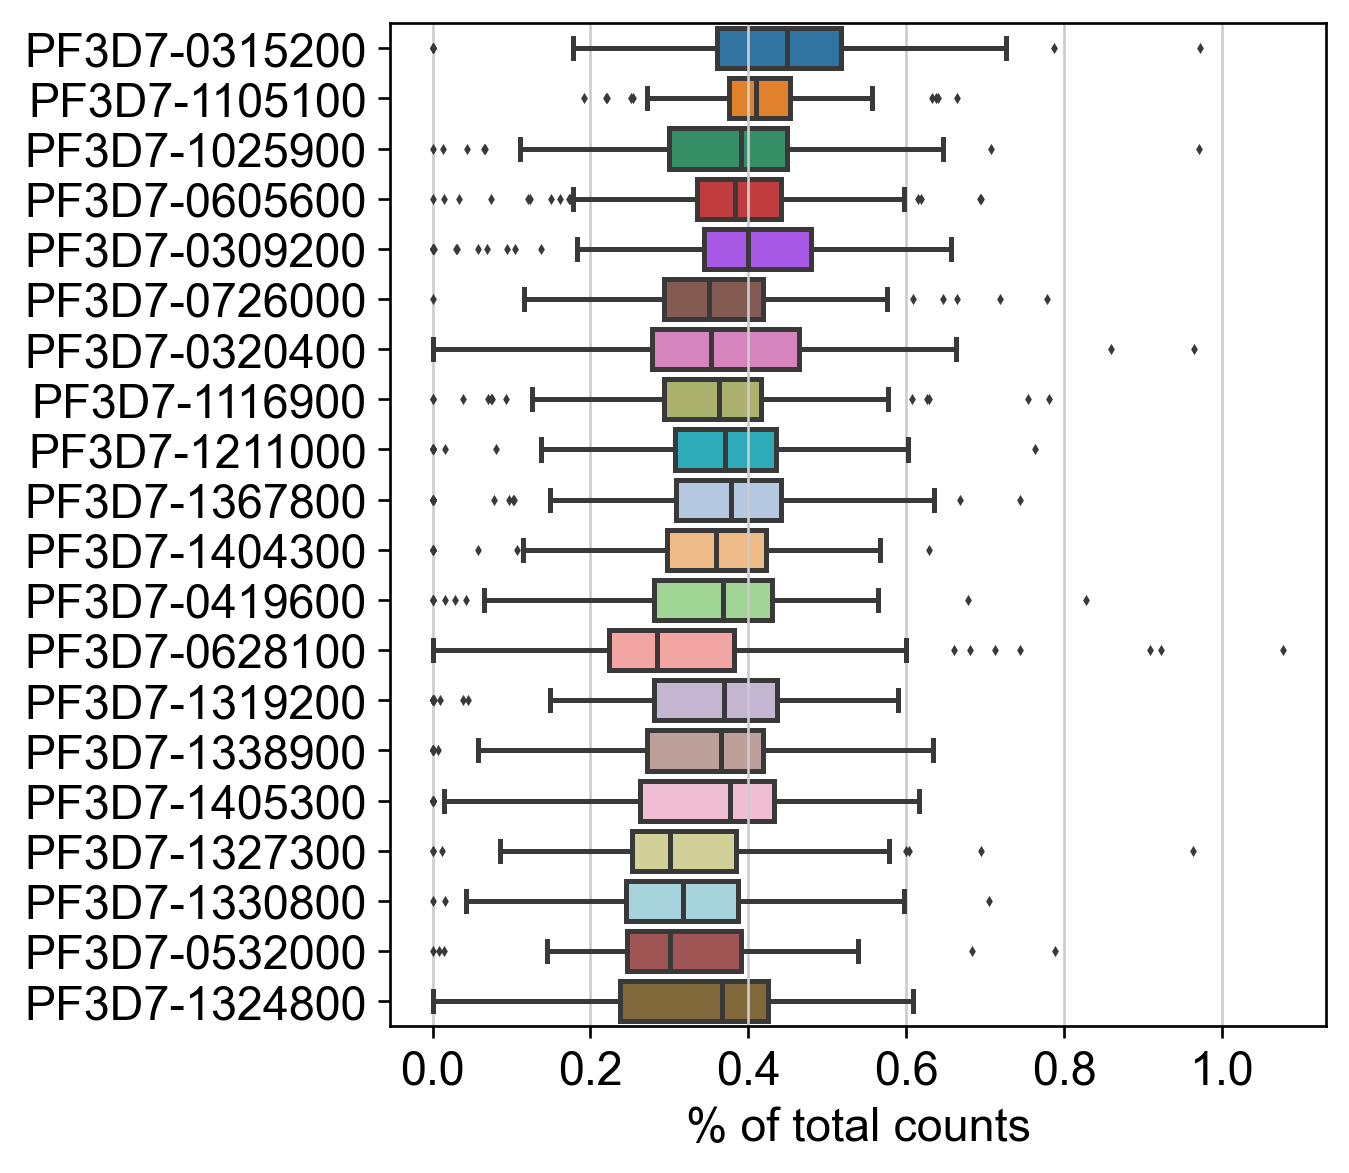

normalizing counts per cell
    finished (0:00:00)


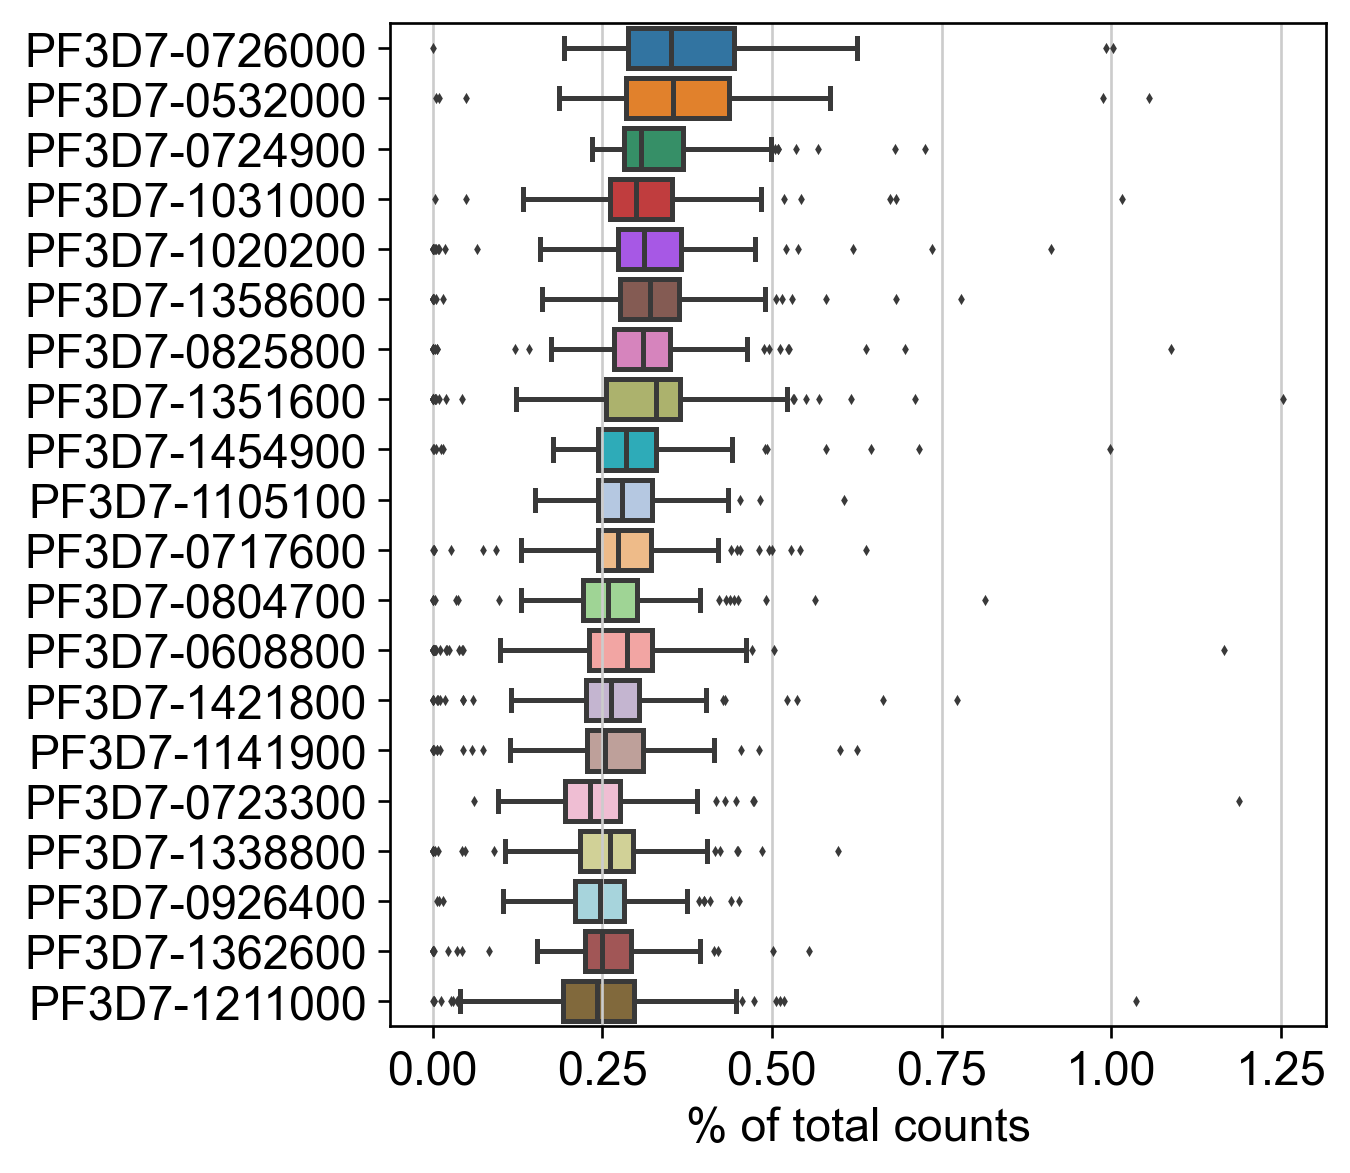

In [353]:
sc.pl.highest_expr_genes(adata_ref, n_top=20, )
sc.pl.highest_expr_genes(adata, n_top=20, )

In [296]:
sc.pp.filter_cells(adata_ref, min_genes=200)
sc.pp.filter_genes(adata_ref, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1564 genes that are detected in less than 3 cells
filtered out 224 genes that are detected in less than 3 cells


In [298]:
adata_ref

AnnData object with n_obs × n_vars = 102 × 3493
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'npgnum', 'tag', 'blastreads', 'blasttop', 'sample_id', 'stage', 'day', 'num_cells', 'cell_num', 'library', 'well', 'time', 'treatment', 'date', 'run', 'filename', 'xfilename', 'strain', 'gate', 'sum', 'detected', 'percent_top_50', 'percent_top_100', 'percent_top_200', 'percent_top_500', 'total', 'group', 'use', 'sizeFactor', 'file', 'sample_accession', 'global_seurat_clusters', 'pseudopseudotime', 'gam_sex', 'ook_seurat_clusters', 'ook_slingPseudotime', 'integration_clusters', 'scmap_topcell', 'scmap_topcell_ShortenedLifeStage2', 'scmap_topcell_cossim', 'spz_seurat_clusters', 'spz_slingshot_pseudotime', 'r_Spearman_Lindner', 'Prediction_Spearman_Lindner', 'r_Pearsons_Lindner', 'Prediction_Pearsons_Lindner', 'act_spz', 'n_genes'
    var: 'features', 'n_cells'

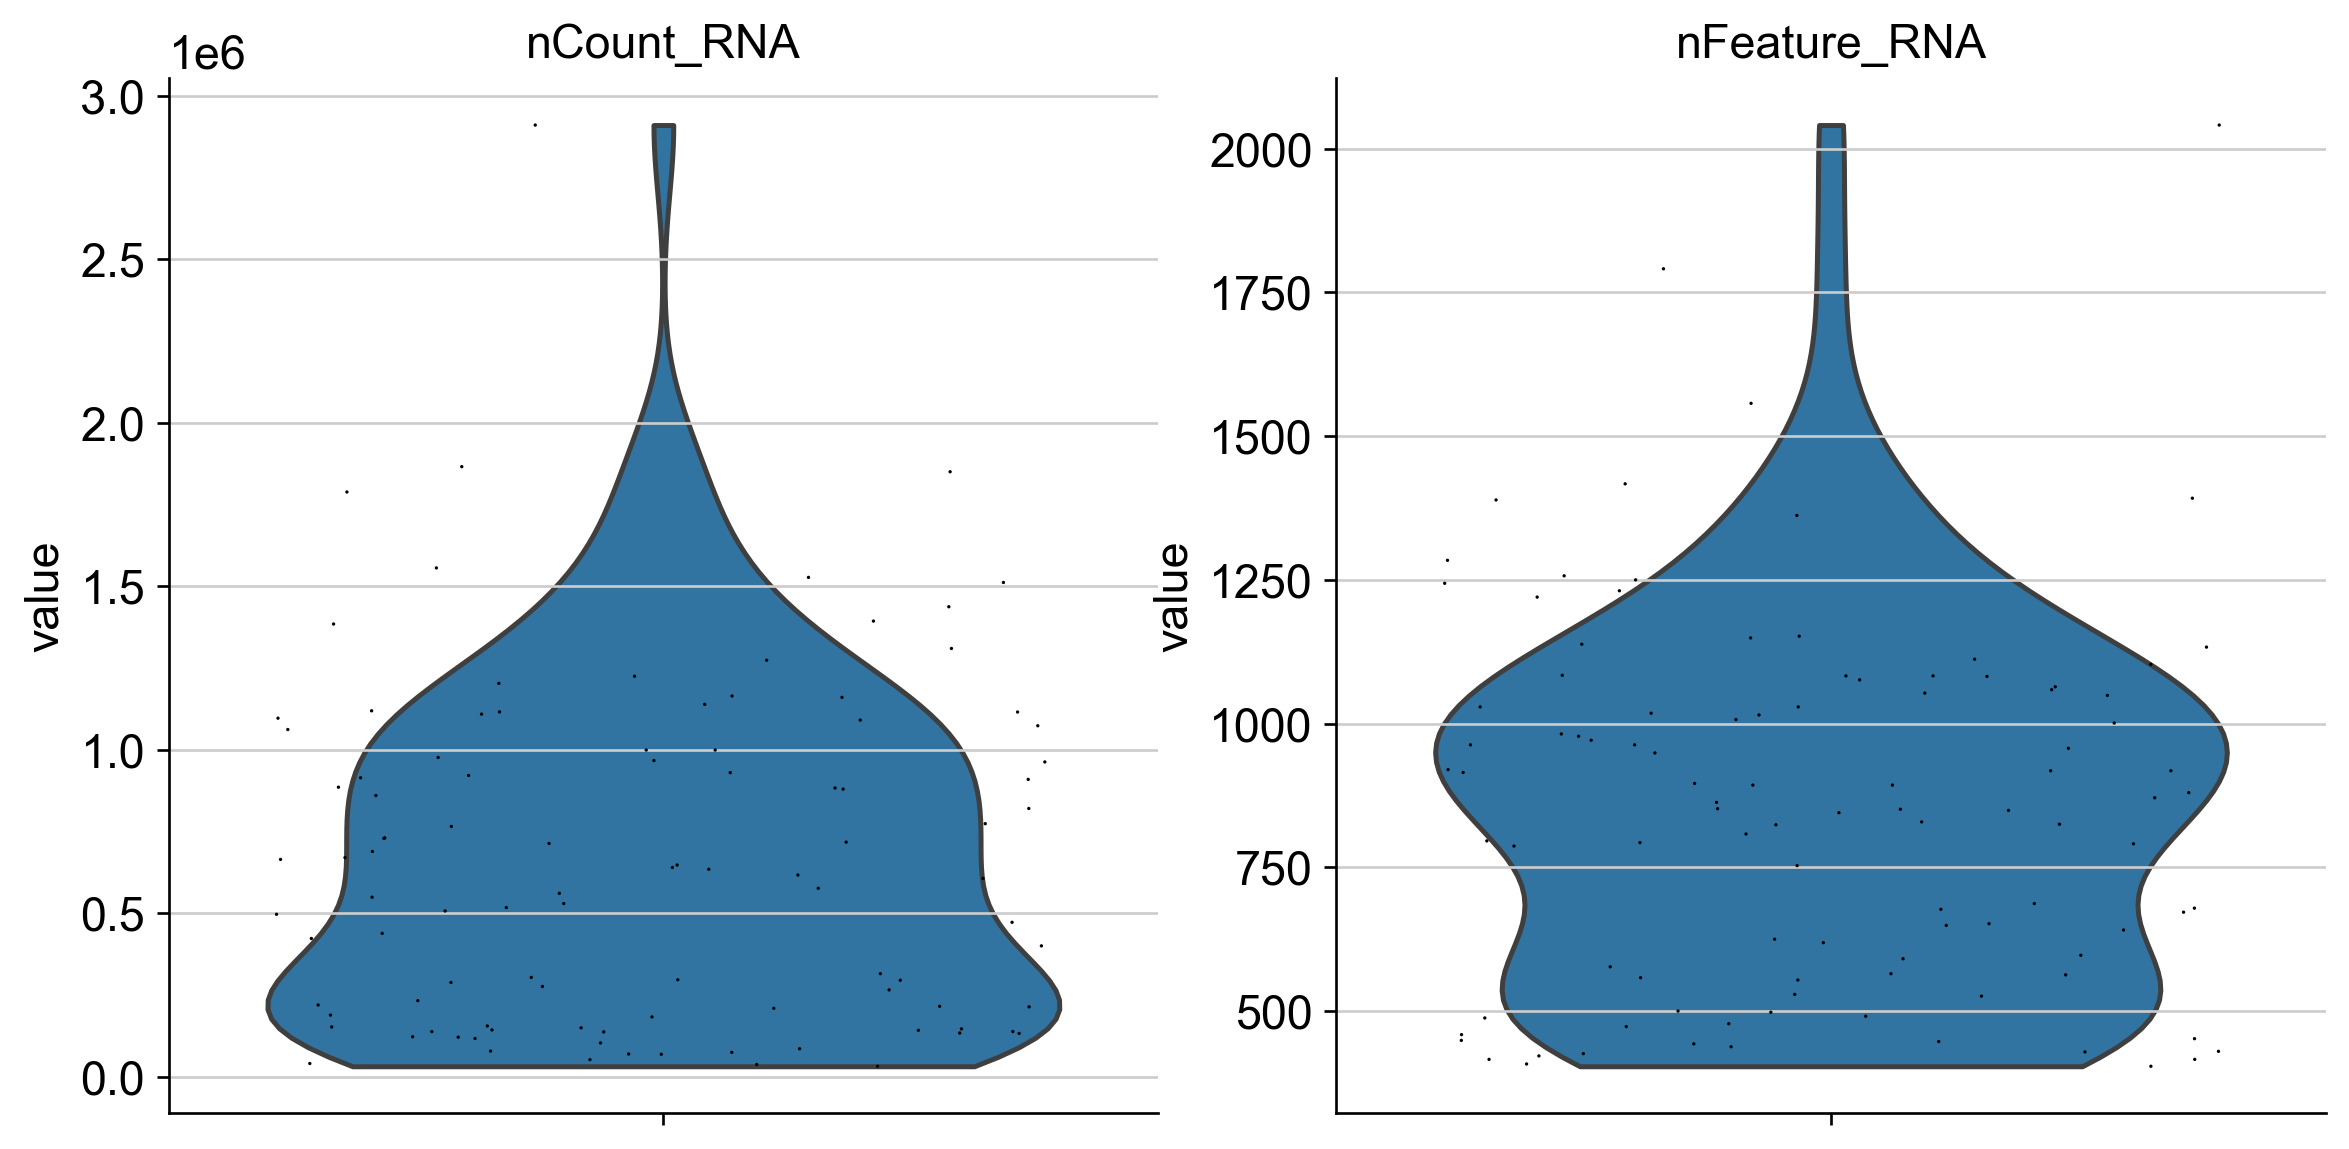

In [352]:
sc.pl.violin(adata_ref, ['nCount_RNA', 'nFeature_RNA'],
             jitter=0.4, multi_panel=True)

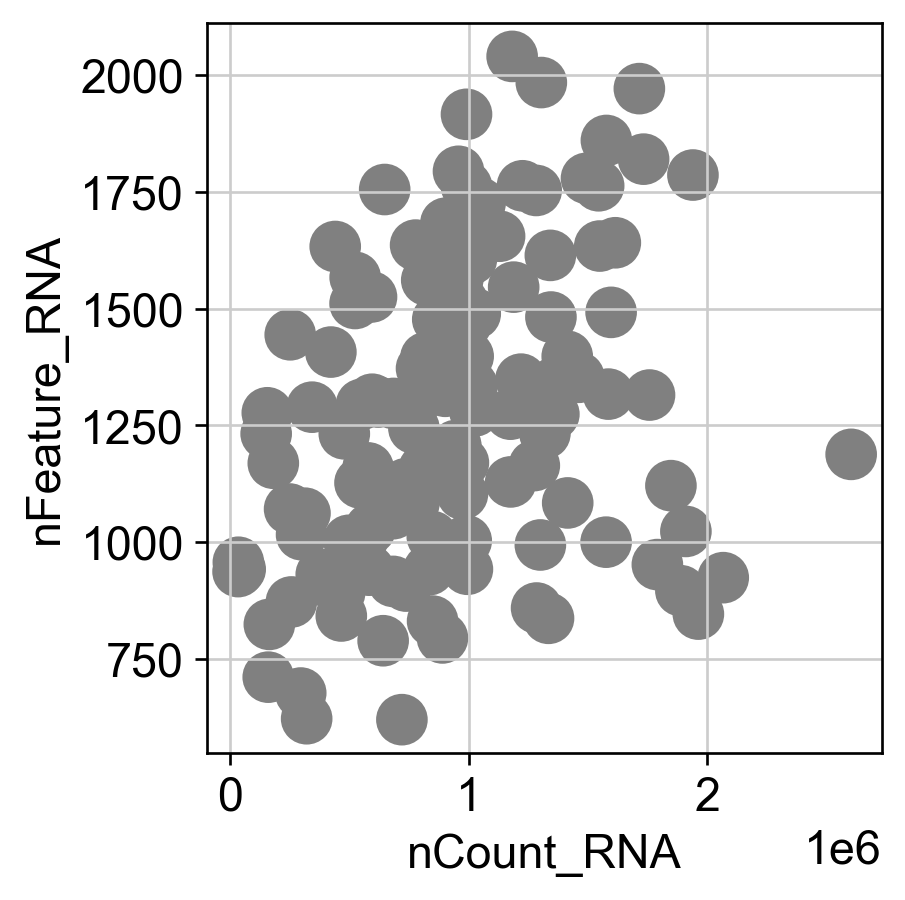

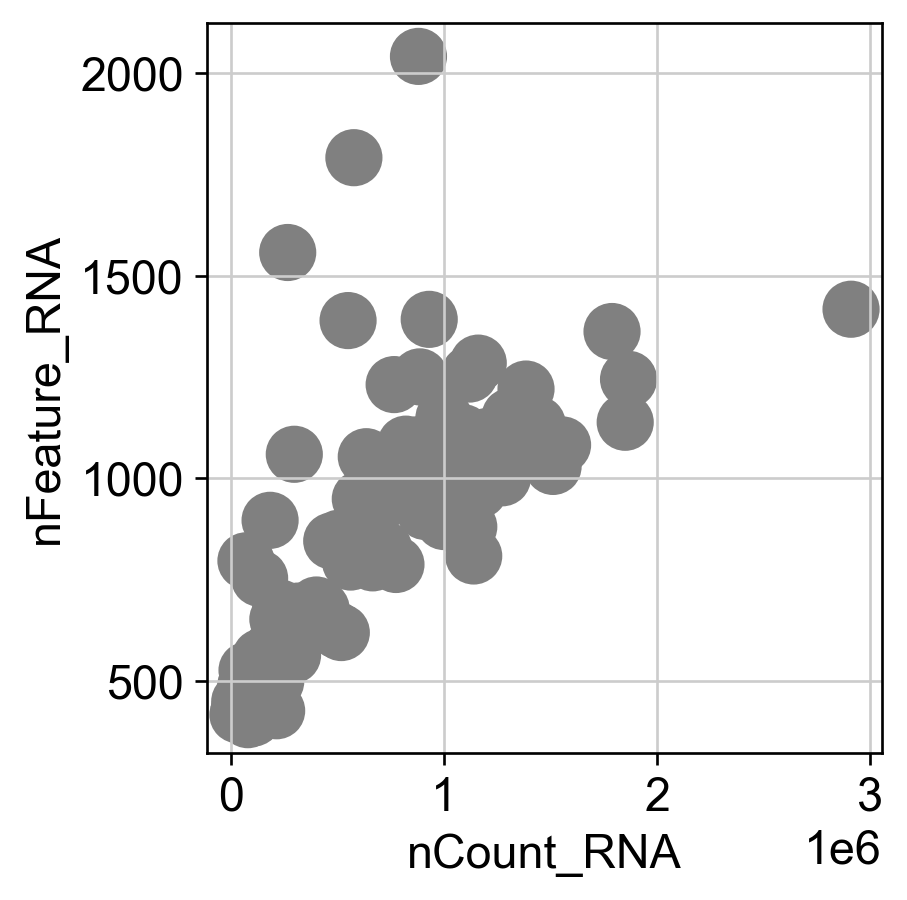

In [301]:
sc.pl.scatter(adata, x='nCount_RNA', y='nFeature_RNA')
sc.pl.scatter(adata_ref, x='nCount_RNA', y='nFeature_RNA')

In [302]:
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


In [303]:
sc.pp.log1p(adata_ref)
sc.pp.log1p(adata)

In [305]:
sc.pp.highly_variable_genes(adata_ref, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


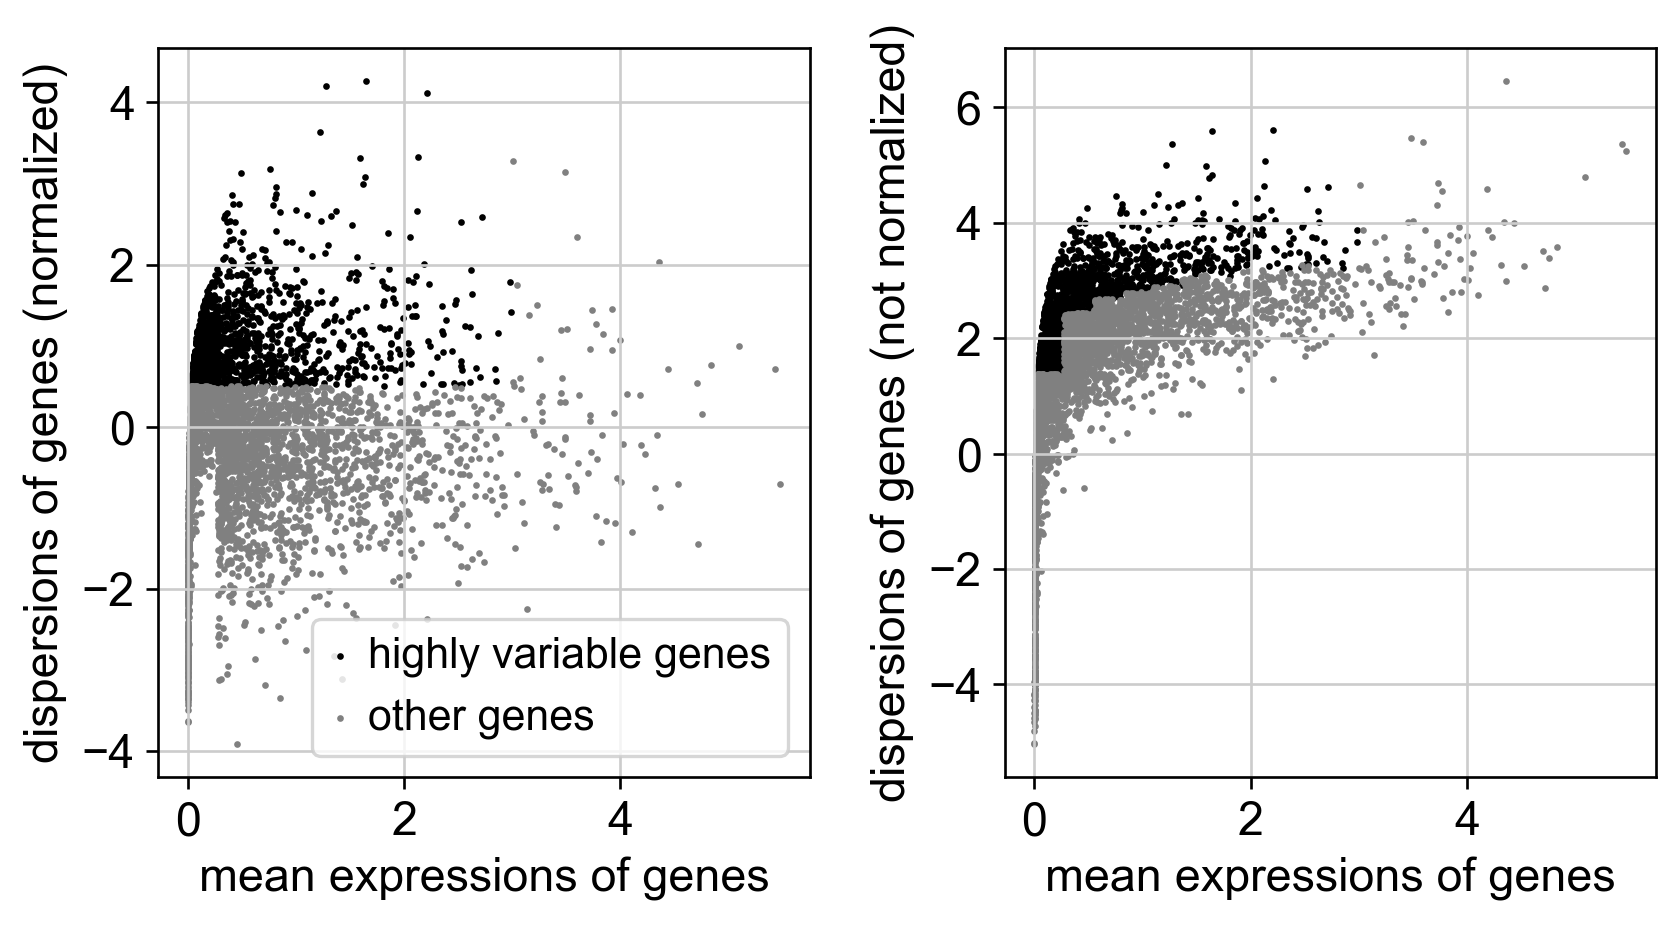

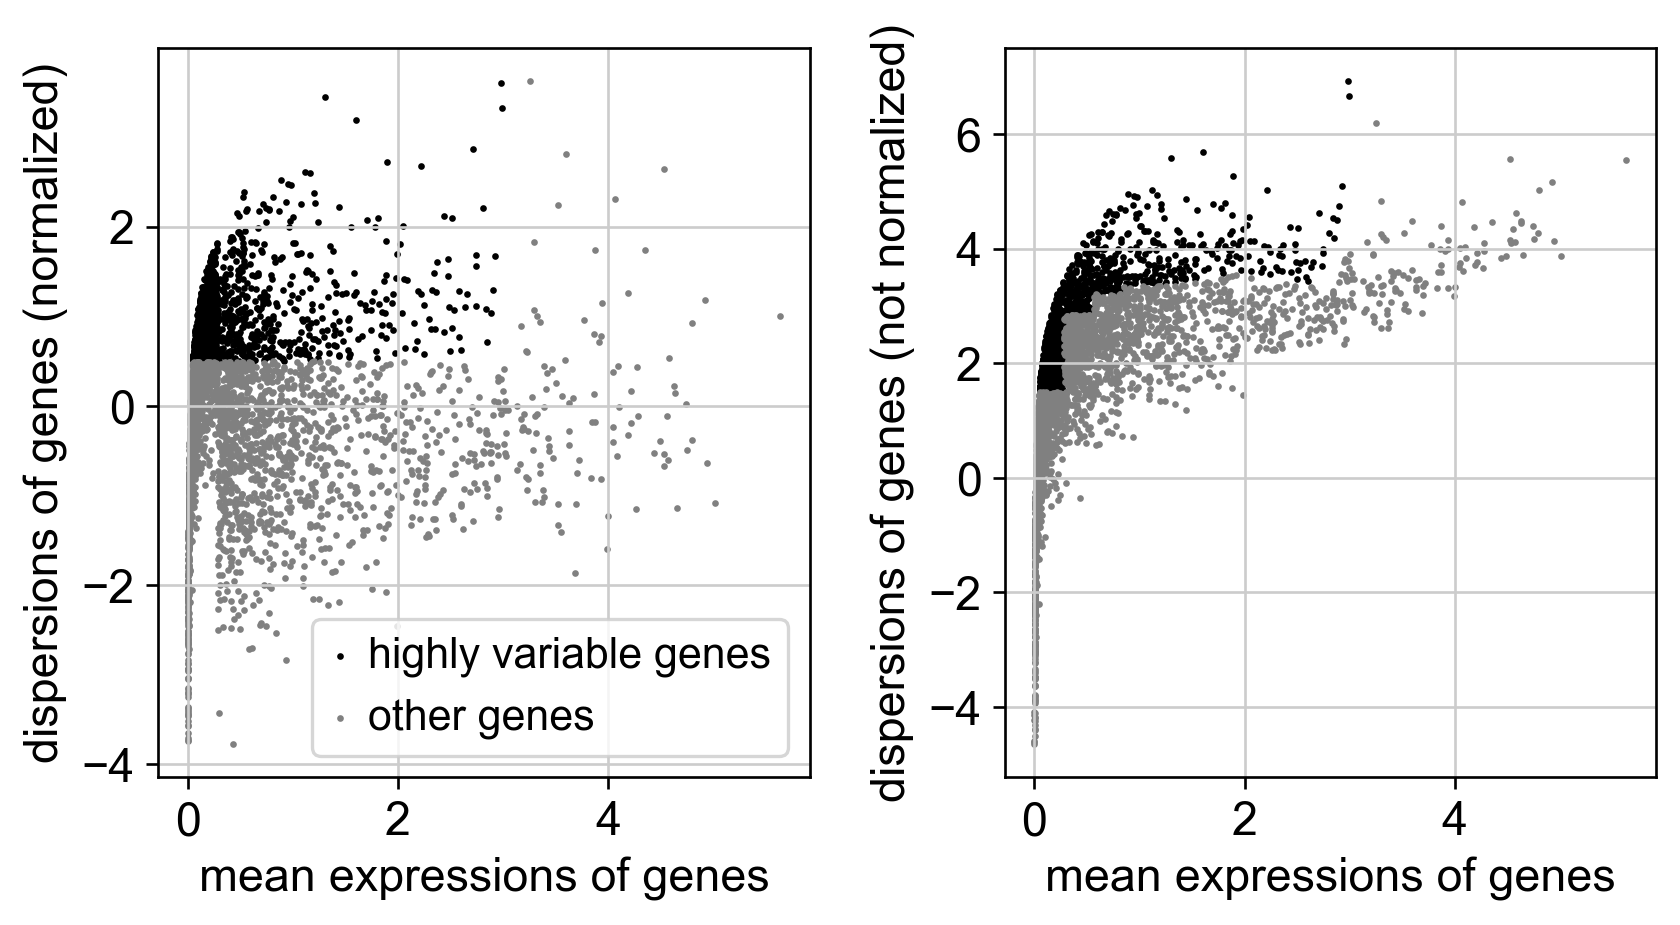

In [306]:
sc.pl.highly_variable_genes(adata)
sc.pl.highly_variable_genes(adata_ref)

In [307]:
sc.tl.pca(adata, svd_solver='arpack')
sc.tl.pca(adata_ref, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


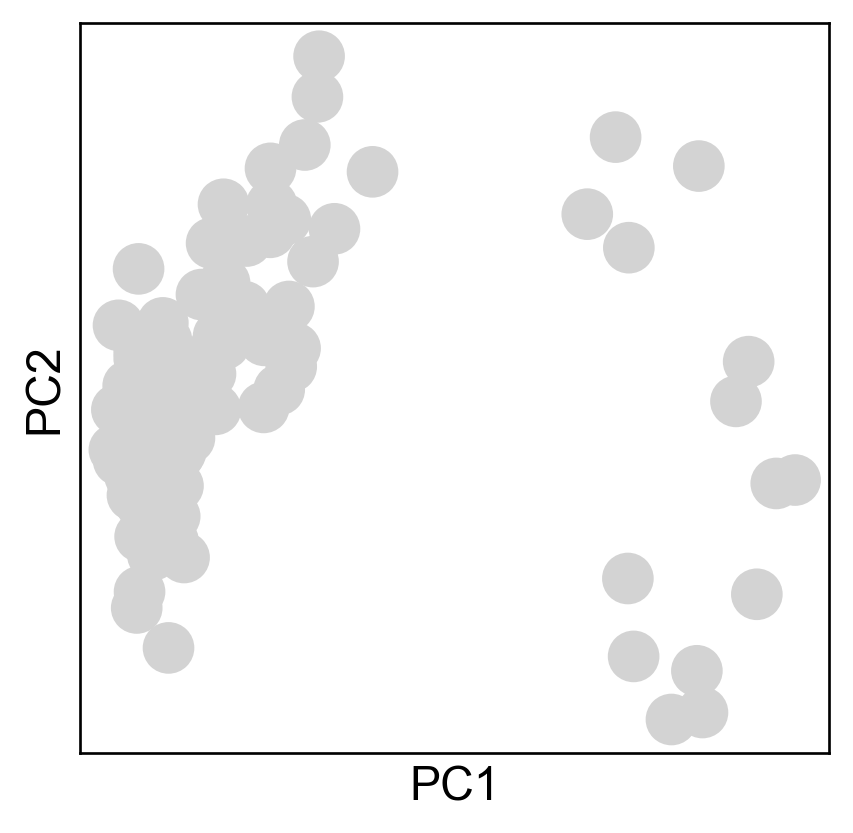

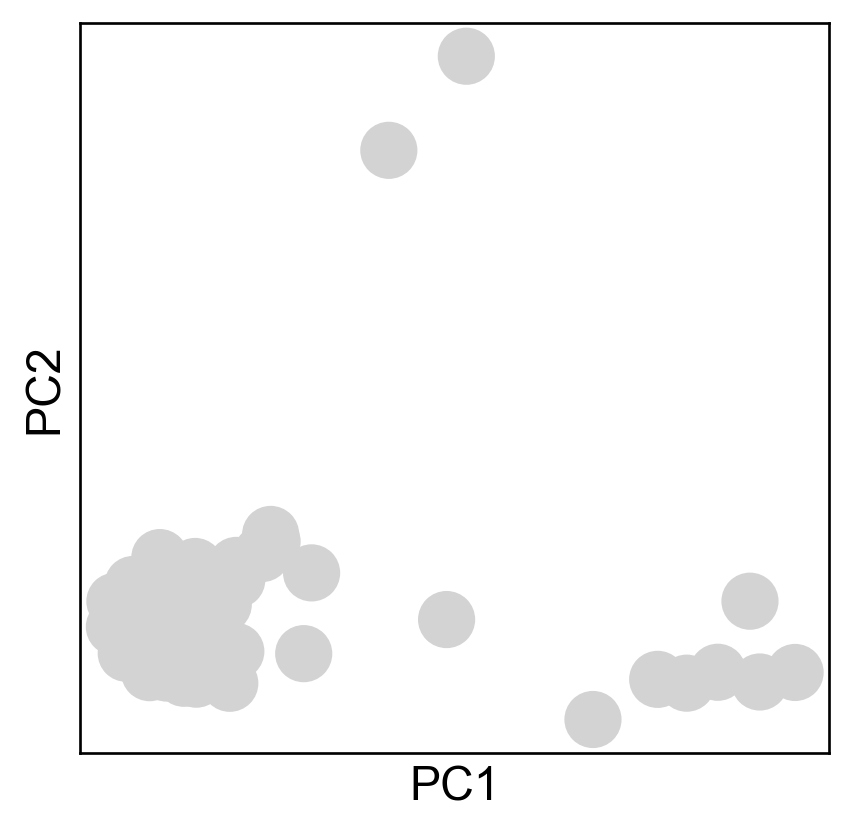

In [308]:
sc.pl.pca(adata)
sc.pl.pca(adata_ref)

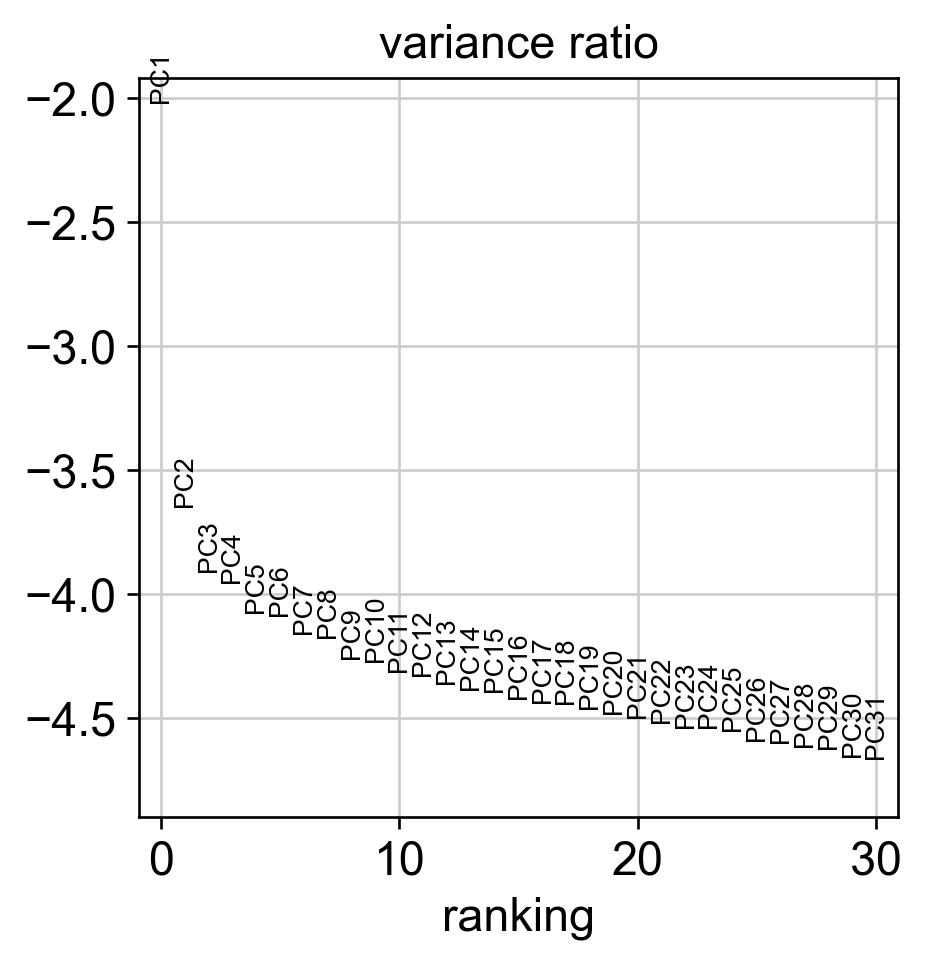

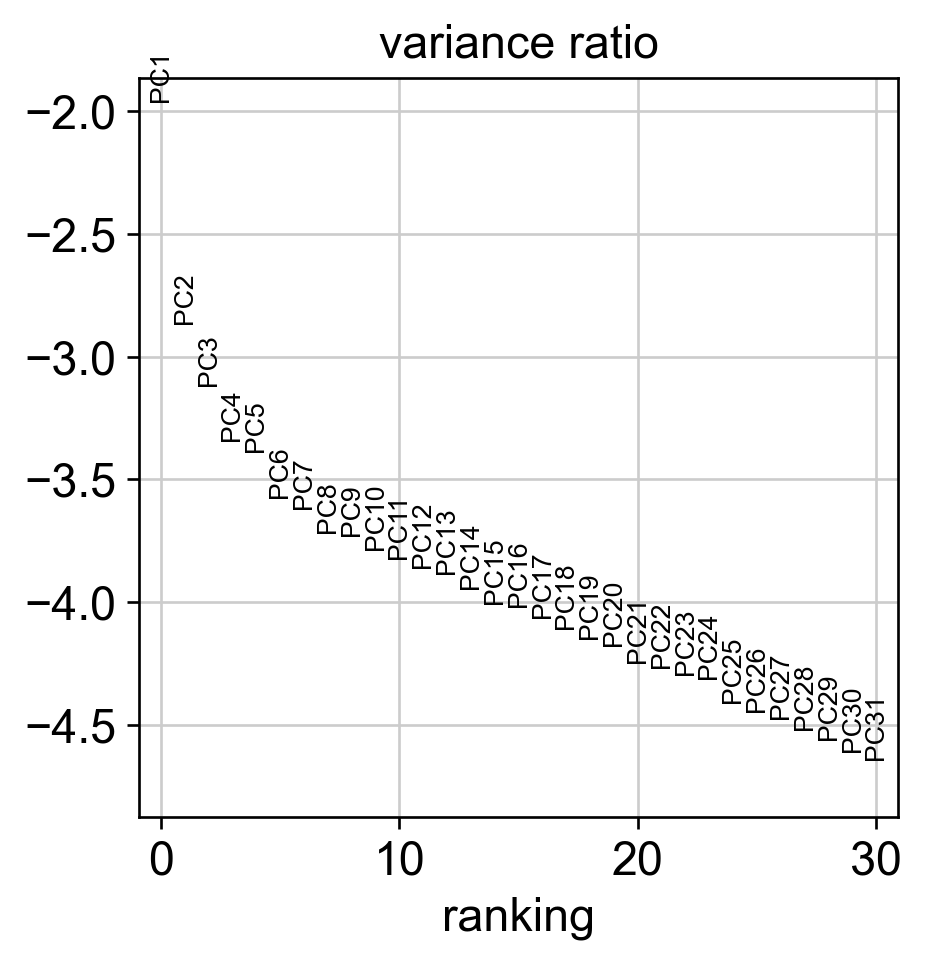

In [309]:
sc.pl.pca_variance_ratio(adata, log=True)
sc.pl.pca_variance_ratio(adata_ref, log=True)

In [310]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.louvain(adata)
sc.pp.neighbors(adata_ref, n_neighbors=10, n_pcs=5)
sc.tl.louvain(adata_ref)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 6 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 5
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [311]:
sc.tl.umap(adata)
sc.tl.umap(adata_ref)


#sc.pl.umap(adata, color=['Timepoint'], bais= ['UMAP_on_PCA'], wspace =0.4)
#sc.pl.umap(adata_ref, color=['day'], keys= ['UMAP_on_PCA'], wspace =0.4)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


In [312]:
adata.obs['Timepoint']

T0-10     0
T0-11     0
T0-1      0
T0-12     0
T0-16     0
         ..
T20-20    5
T20-2     5
T20-3     5
T20-6     5
T20-8     5
Name: Timepoint, Length: 125, dtype: int32

In [313]:
adata.obs['Timepoint'] = "Timepoint"
NFFG =adata.obs_names.str.startswith('T0')
h_2 =adata.obs_names.str.startswith('T2')
h_4 = adata.obs_names.str.startswith('T4')
h_8 =adata.obs_names.str.startswith('T8')
h_12 =adata.obs_names.str.startswith('T12')
h_20 = adata.obs_names.str.startswith('T20')


adata.obs.loc[NFFG, 'Timepoint'] = 'NFFG'
adata.obs.loc[h_2, 'Timepoint'] = '2h'
adata.obs.loc[h_4, 'Timepoint'] = '4h'
adata.obs.loc[h_8, 'Timepoint'] = '8h'
adata.obs.loc[h_12, 'Timepoint'] = '12h'
adata.obs.loc[h_20, 'Timepoint'] = '20h'

... storing 'Timepoint' as categorical


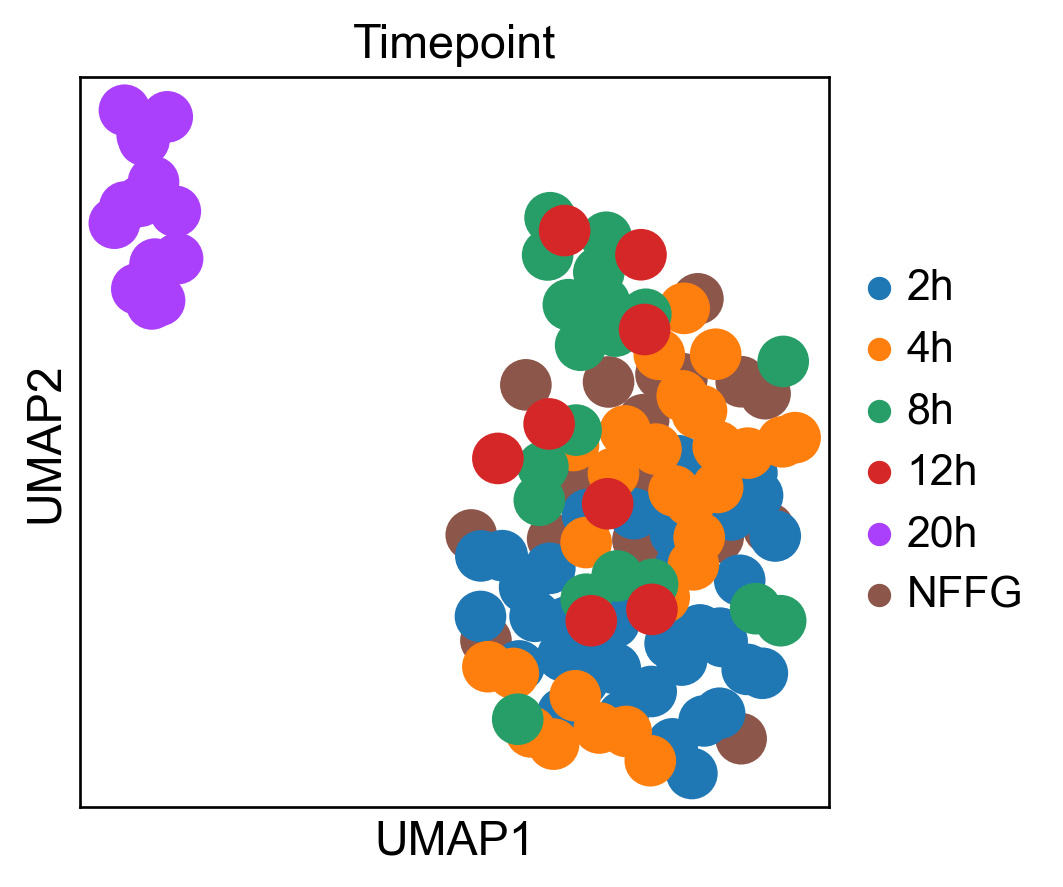

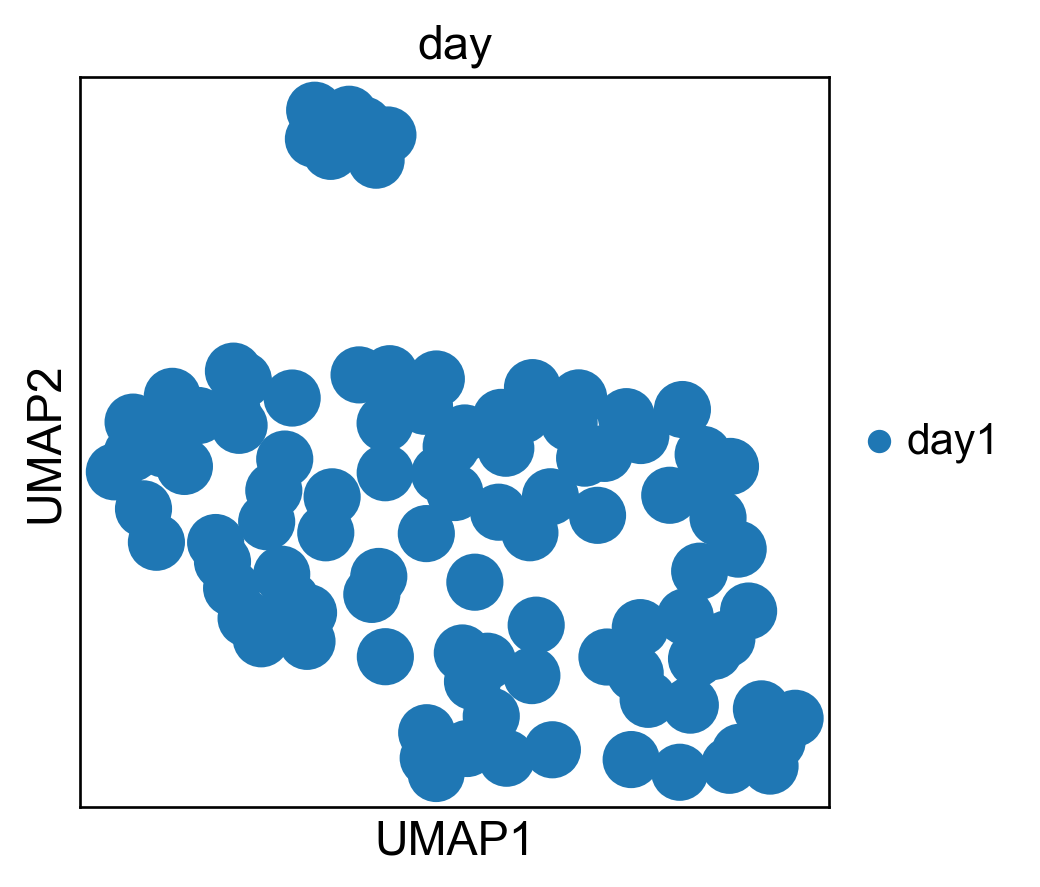

In [314]:
sc.pl.umap(adata, color="Timepoint")
sc.pl.umap(adata_ref, color="day")

In [315]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [316]:
adata_ref.var_names

Index(['PF3D7-0101300', 'PF3D7-0102600', 'PF3D7-0102700', 'PF3D7-0102800',
       'PF3D7-0102900', 'PF3D7-0103000', 'PF3D7-0103100', 'PF3D7-0103200',
       'PF3D7-0103300', 'PF3D7-0103400',
       ...
       'malmito-rna-RNA12', 'mal-rna-14', 'malmito-rna-RNA7',
       'malmito-rna-RNA11', 'mal-rna-15', 'malmito-rna-SSUF',
       'malmito-rna-RNA14', 'mal-rna-17', 'mal-rna-18', 'mal-rna-19'],
      dtype='object', length=3374)

In [317]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


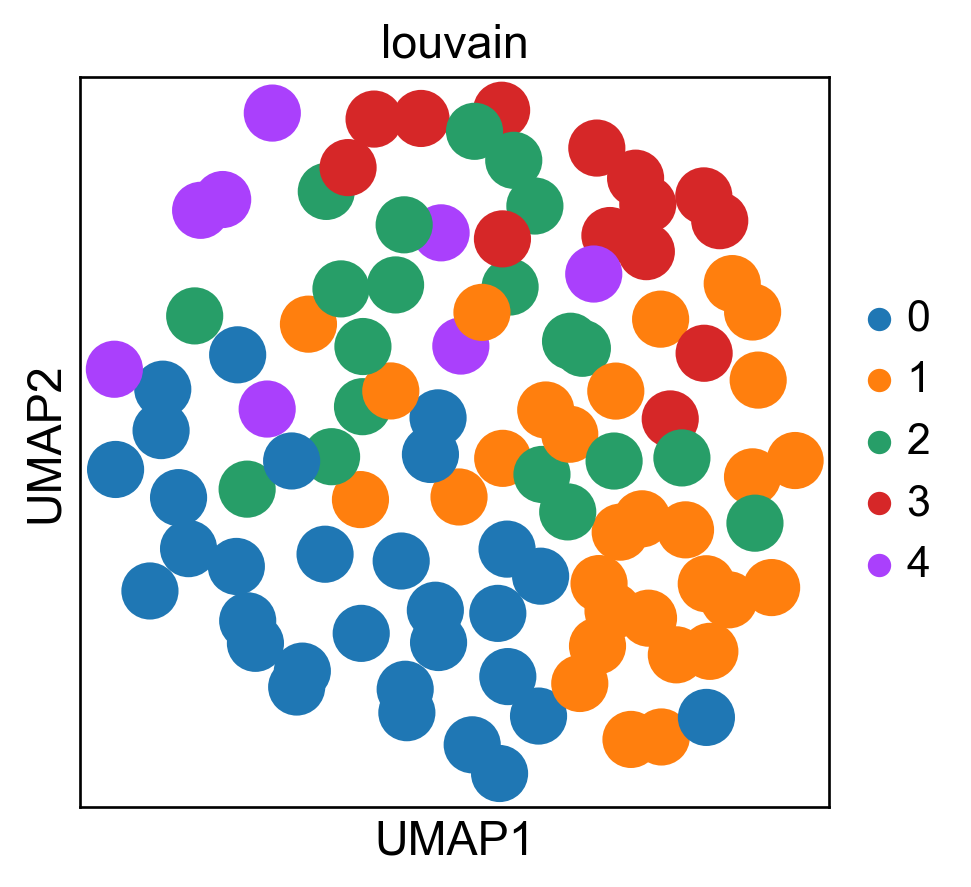

In [323]:
sc.pl.umap(adata_ref, color='louvain')

In [320]:
adata_ref

AnnData object with n_obs × n_vars = 102 × 3374
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'npgnum', 'tag', 'blastreads', 'blasttop', 'sample_id', 'stage', 'day', 'num_cells', 'cell_num', 'library', 'well', 'time', 'treatment', 'date', 'run', 'filename', 'xfilename', 'strain', 'gate', 'sum', 'detected', 'percent_top_50', 'percent_top_100', 'percent_top_200', 'percent_top_500', 'total', 'group', 'use', 'sizeFactor', 'file', 'sample_accession', 'global_seurat_clusters', 'pseudopseudotime', 'gam_sex', 'ook_seurat_clusters', 'ook_slingPseudotime', 'integration_clusters', 'scmap_topcell', 'scmap_topcell_ShortenedLifeStage2', 'scmap_topcell_cossim', 'spz_seurat_clusters', 'spz_slingshot_pseudotime', 'r_Spearman_Lindner', 'Prediction_Spearman_Lindner', 'r_Pearsons_Lindner', 'Prediction_Pearsons_Lindner', 'act_spz', 'n_genes', 'louvain'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'louvain',

In [324]:
sc.tl.ingest(adata, adata_ref, obs='louvain')

running ingest
    finished (0:00:02)


In [325]:
adata.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix colors

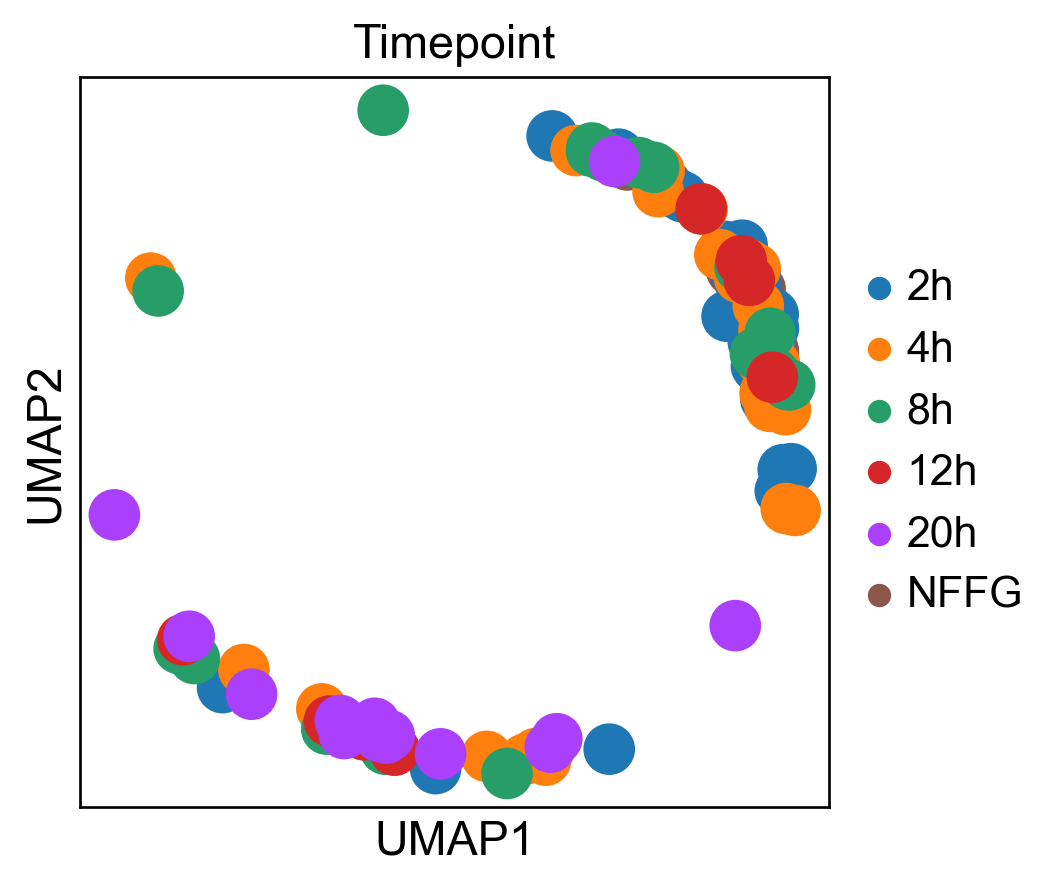

In [326]:
sc.pl.umap(adata, color=['Timepoint'], wspace=0.5)

In [337]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['Real et al', 'Mohammed et al'])

In [338]:
adata_concat.obs.louvain = adata_concat.obs.louvain.astype('category')
adata_concat.obs.louvain.cat.reorder_categories(adata_ref.obs.louvain.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['louvain_colors'] = adata_ref.uns['louvain_colors'] 

... storing 'tag' as categorical
... storing 'sample_id' as categorical
... storing 'well' as categorical
... storing 'filename' as categorical
... storing 'xfilename' as categorical
... storing 'file' as categorical
... storing 'sample_accession' as categorical


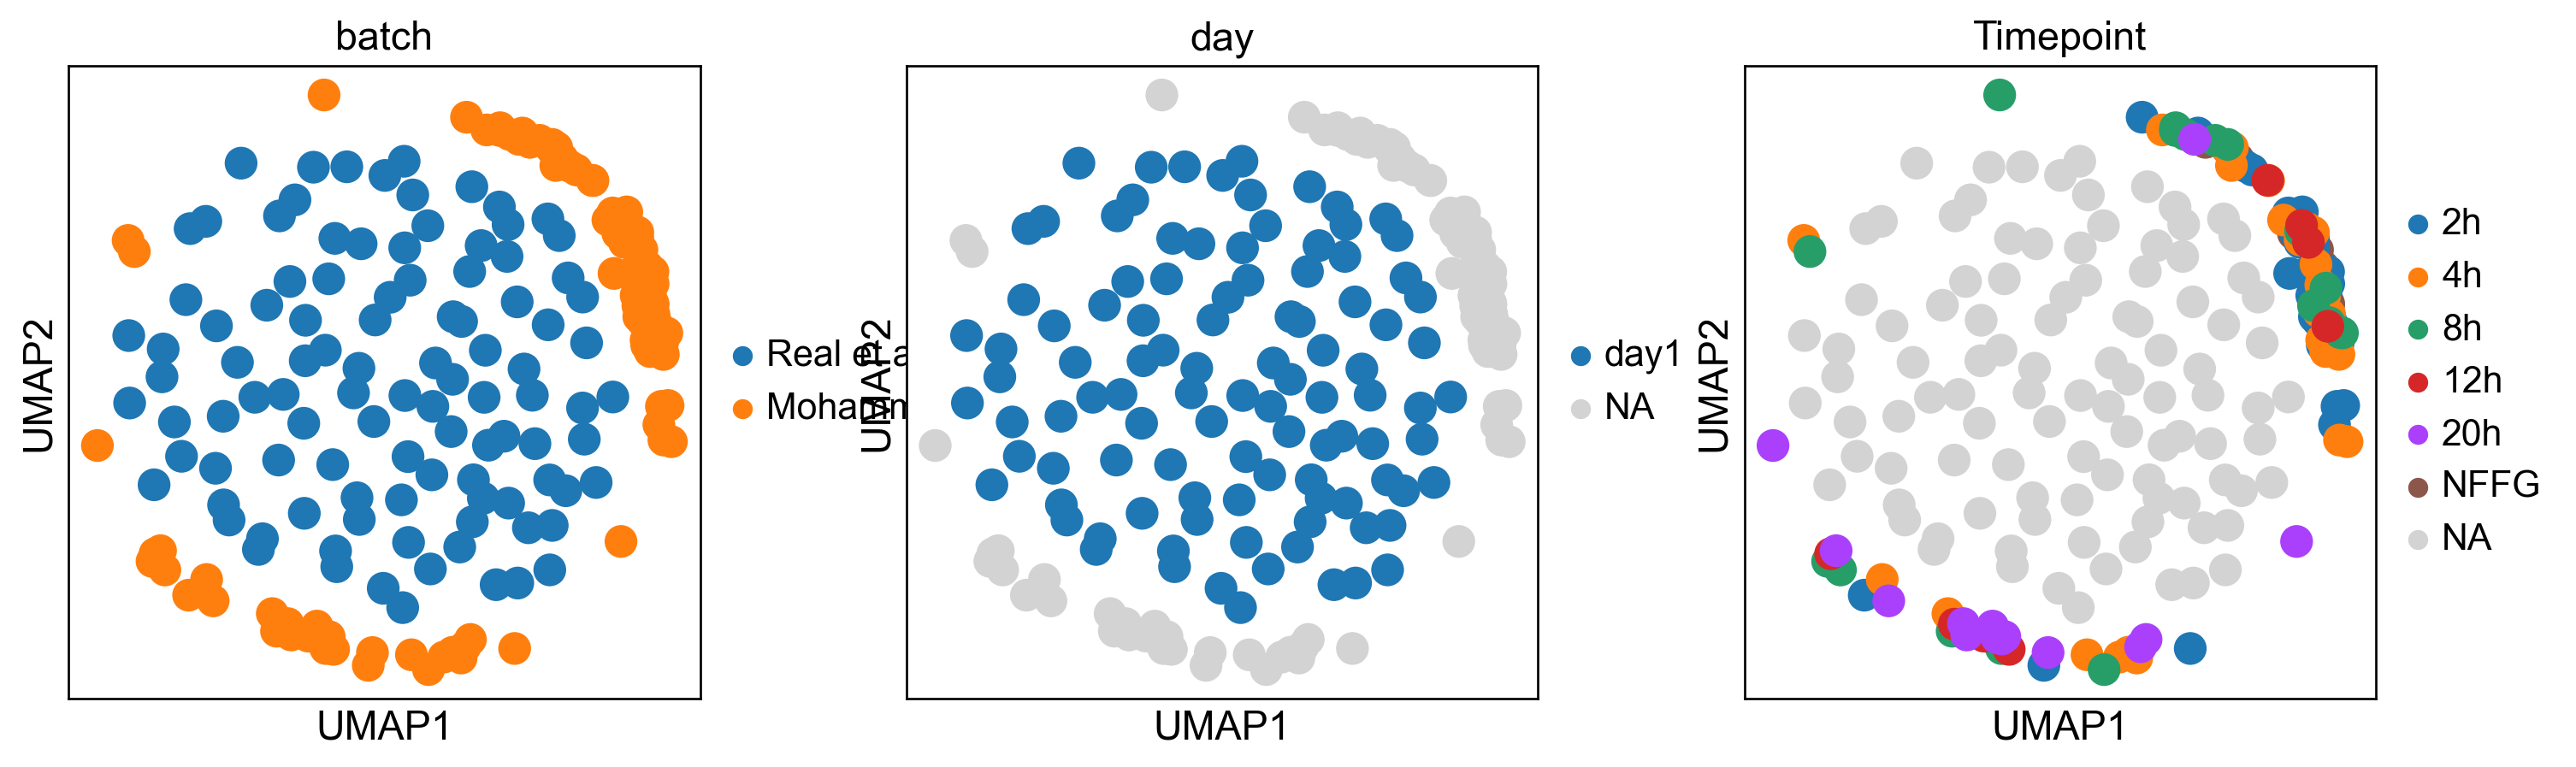

In [339]:
sc.pl.umap(adata_concat, color=['batch', 'day', 'Timepoint'])

In [340]:
#using BbKNN
sc.tl.pca(adata_concat)
#sc.pp.neighbor(adata_concate)
#sc.tl.umap(adata_concat)

computing PCA
    with n_comps=50
    finished (0:00:00)


In [341]:
%%time
sc.external.pp.bbknn(adata_concat, batch_key='batch')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
CPU times: user 34.8 ms, sys: 3.15 ms, total: 38 ms
Wall time: 54.1 ms


In [342]:
sc.tl.umap(adata_concat)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


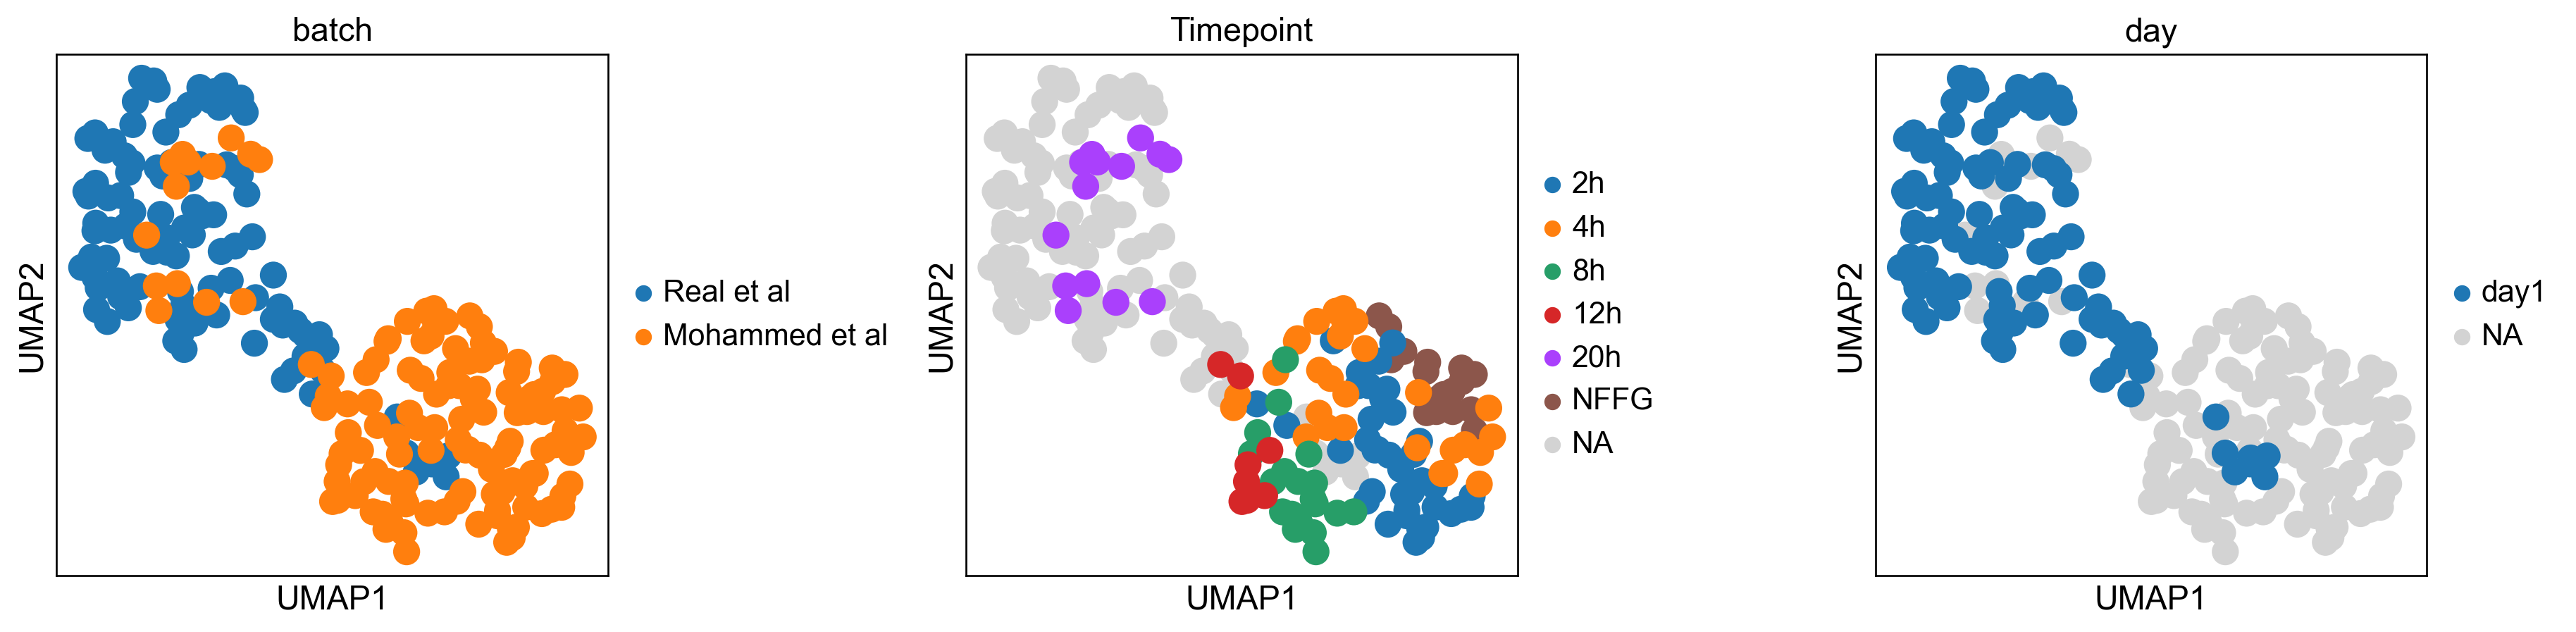

In [356]:
sc.pl.umap(adata_concat, color=['batch', 'Timepoint', 'day'], wspace = 0.5)

In [357]:
sc.tl.embedding_density(adata_concat, groupby='batch')

computing density on 'umap'
--> added
    'umap_density_batch', densities (adata.obs)
    'umap_density_batch_params', parameter (adata.uns)


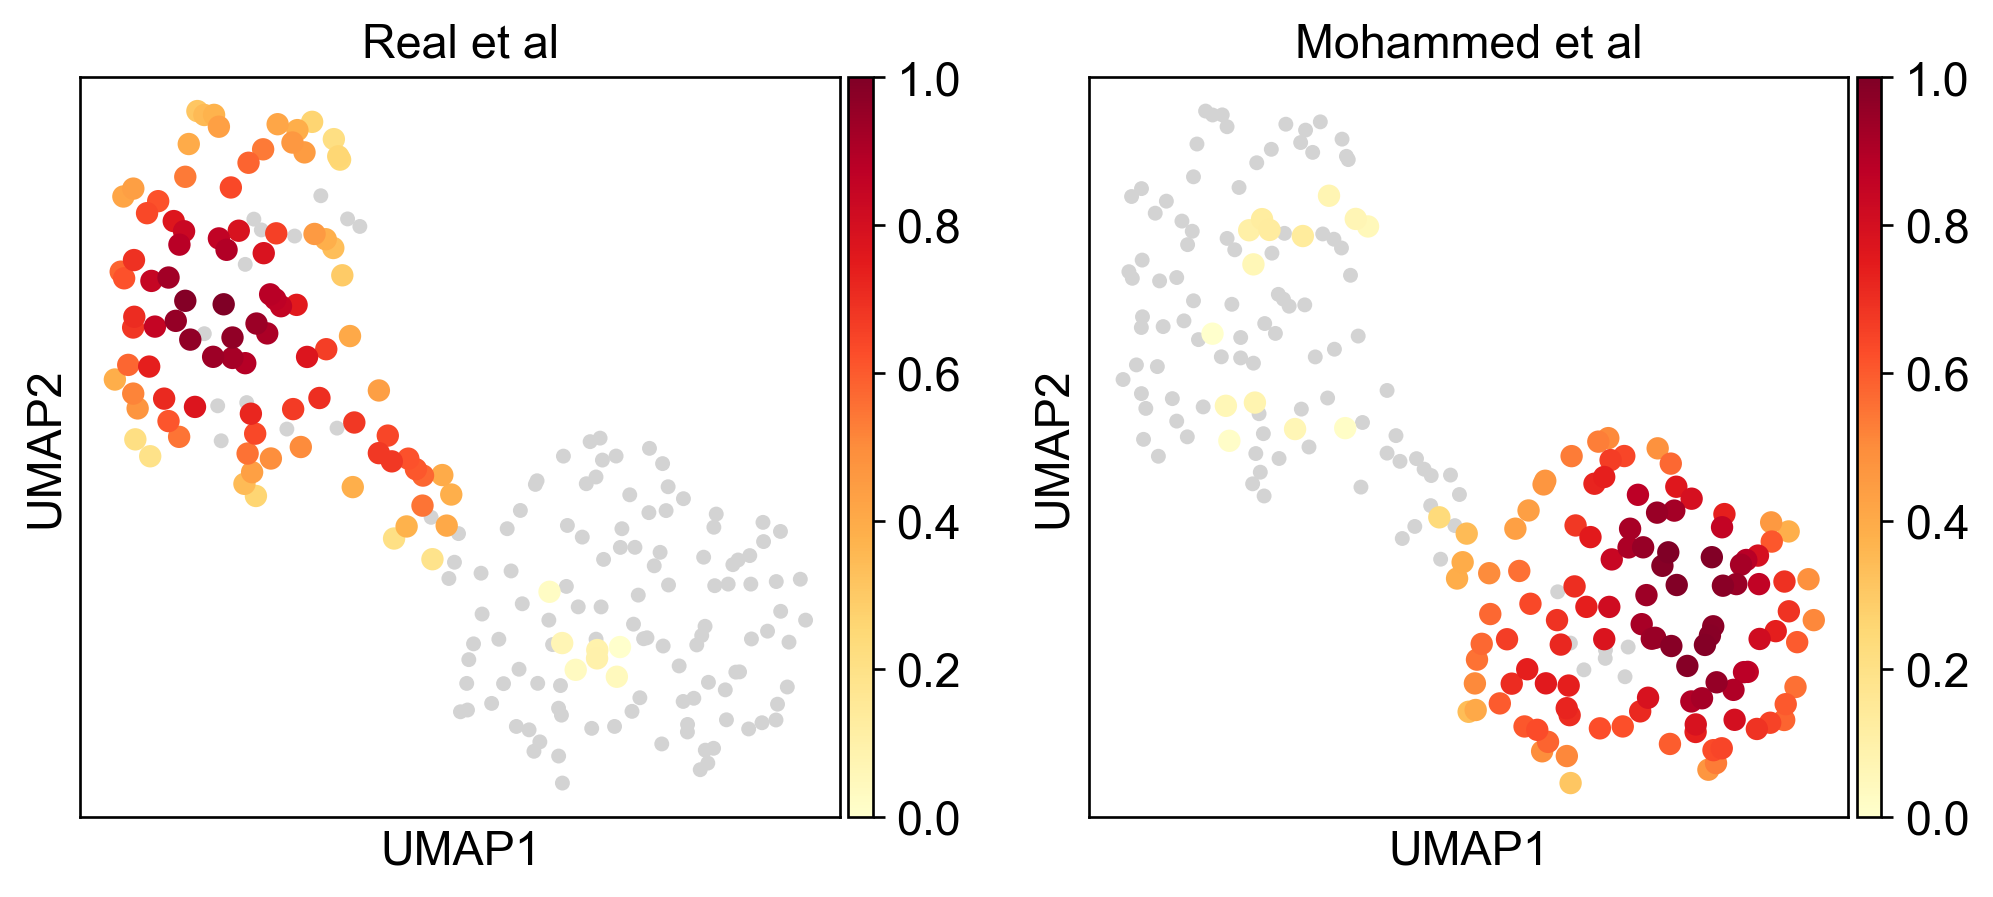

In [358]:
sc.pl.embedding_density(adata_concat, groupby='batch')

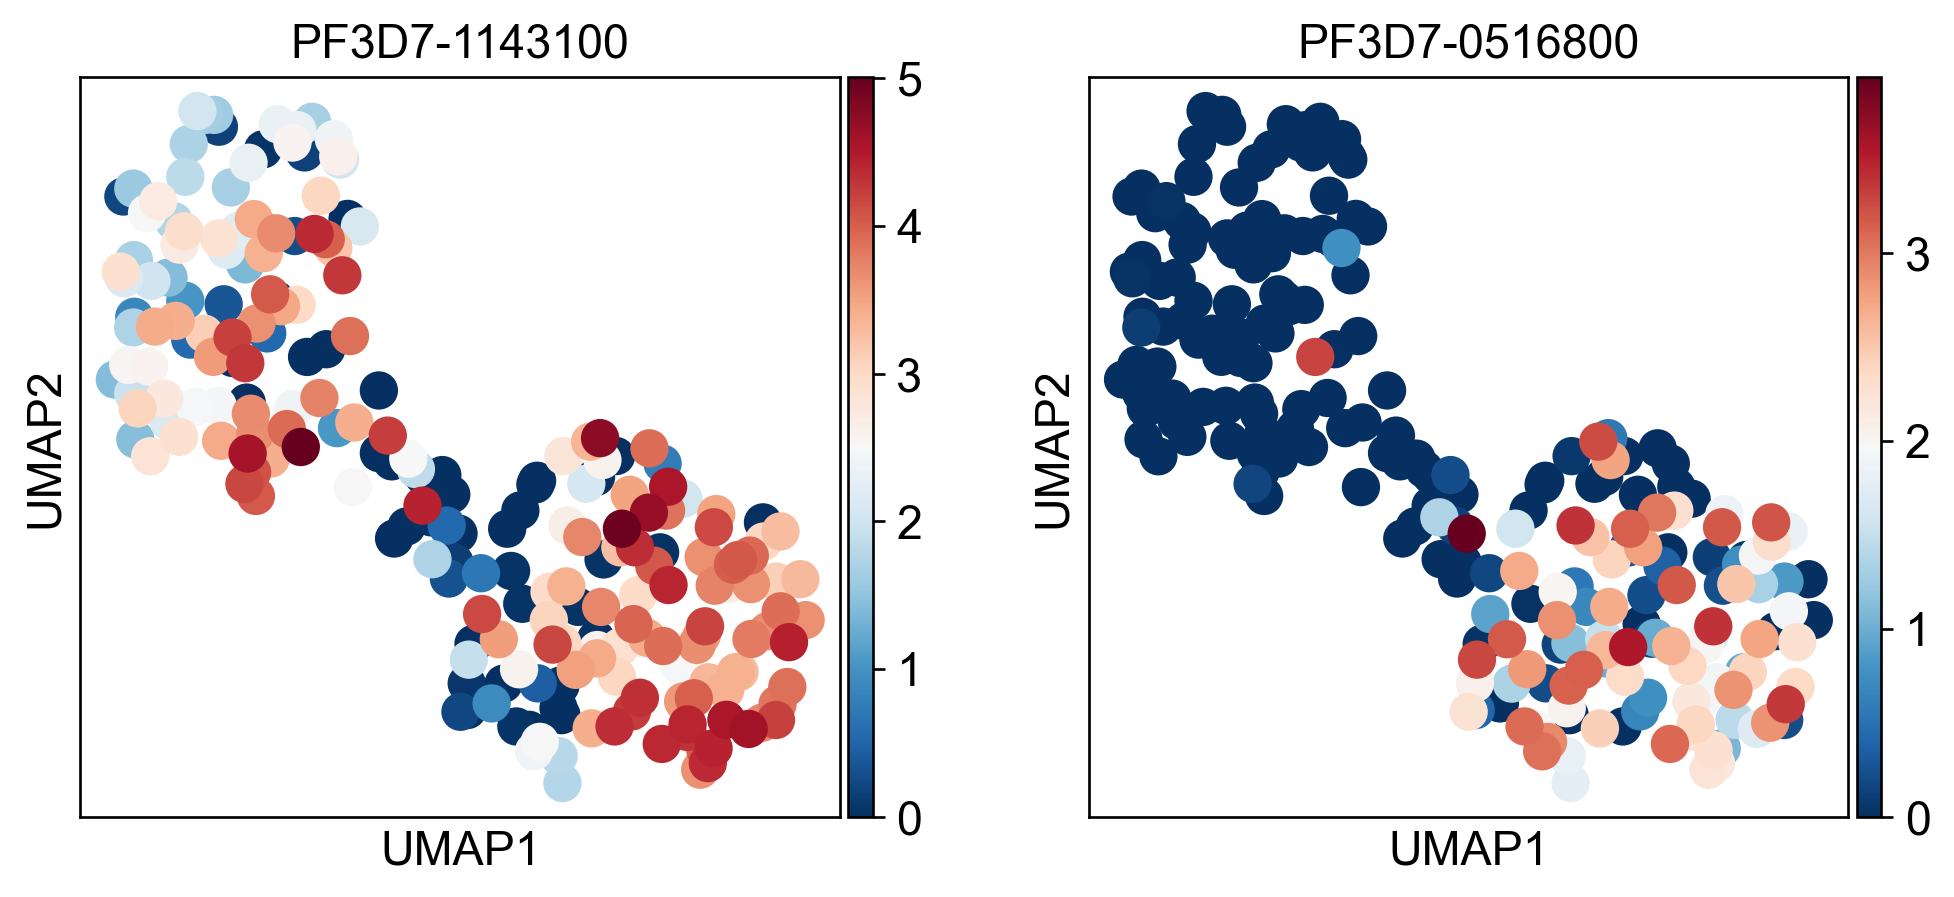

In [401]:
sc.pl.umap(adata_concat, color=['PF3D7-1143100', 'PF3D7-0516800'], use_raw=False, cmap='RdBu_r')

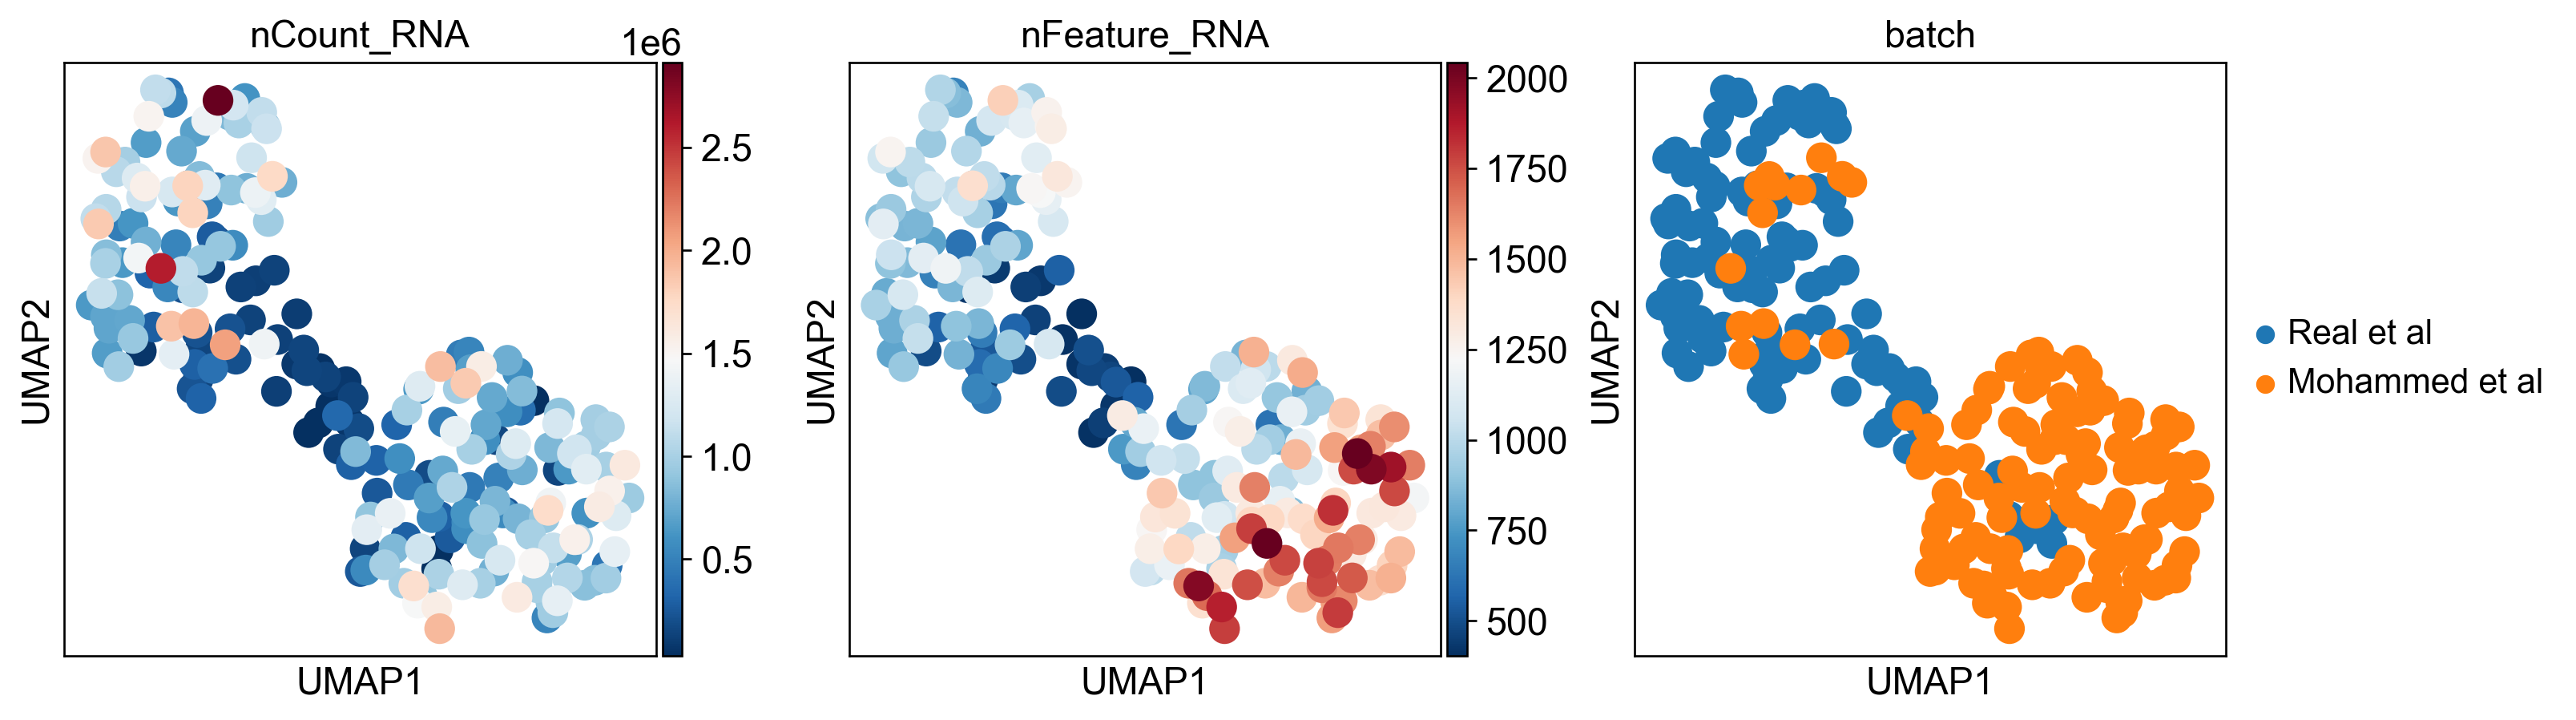

In [403]:
adata_concat
sc.pl.umap(adata_concat, color=['nCount_RNA', 'nFeature_RNA', 'batch'], use_raw=False, cmap='RdBu_r')

In [415]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA Timepoint  num_genes_expressed  \
T0-10            0   1010444.0          1606      NFFG                 1610   
T0-11            0   1181080.0          2040      NFFG                 2060   
T0-1             0    591488.0          1525      NFFG                 1528   
T0-12            0    646738.0          1755      NFFG                 1760   
T0-16            0    961324.0          1635      NFFG                 1636   
...            ...         ...           ...       ...                  ...   
T20-20           0   2602314.0          1188       20h                 1193   
T20-2            0   1299358.0           994       20h                  996   
T20-3            0   1175000.0          1129       20h                 1134   
T20-6            0    846350.0          1012       20h                 1012   
T20-8            0   1789860.0           952       20h                  952   

       Groups  n_genes louvain  
T0-10       C     1606       1  
T0-11       C     2040       1  
T0-1        C     1525       1  
T0-12       C     1755       1  
T0-16       C     1635       1  
...       ...      ...     ...  
T20-20      C     1188       1  
T20-2       C      994       1  
T20-3       C     1129       0  
T20-6       C     1012       1  
T20-8       C      952       1  

[125 rows x 8 columns]

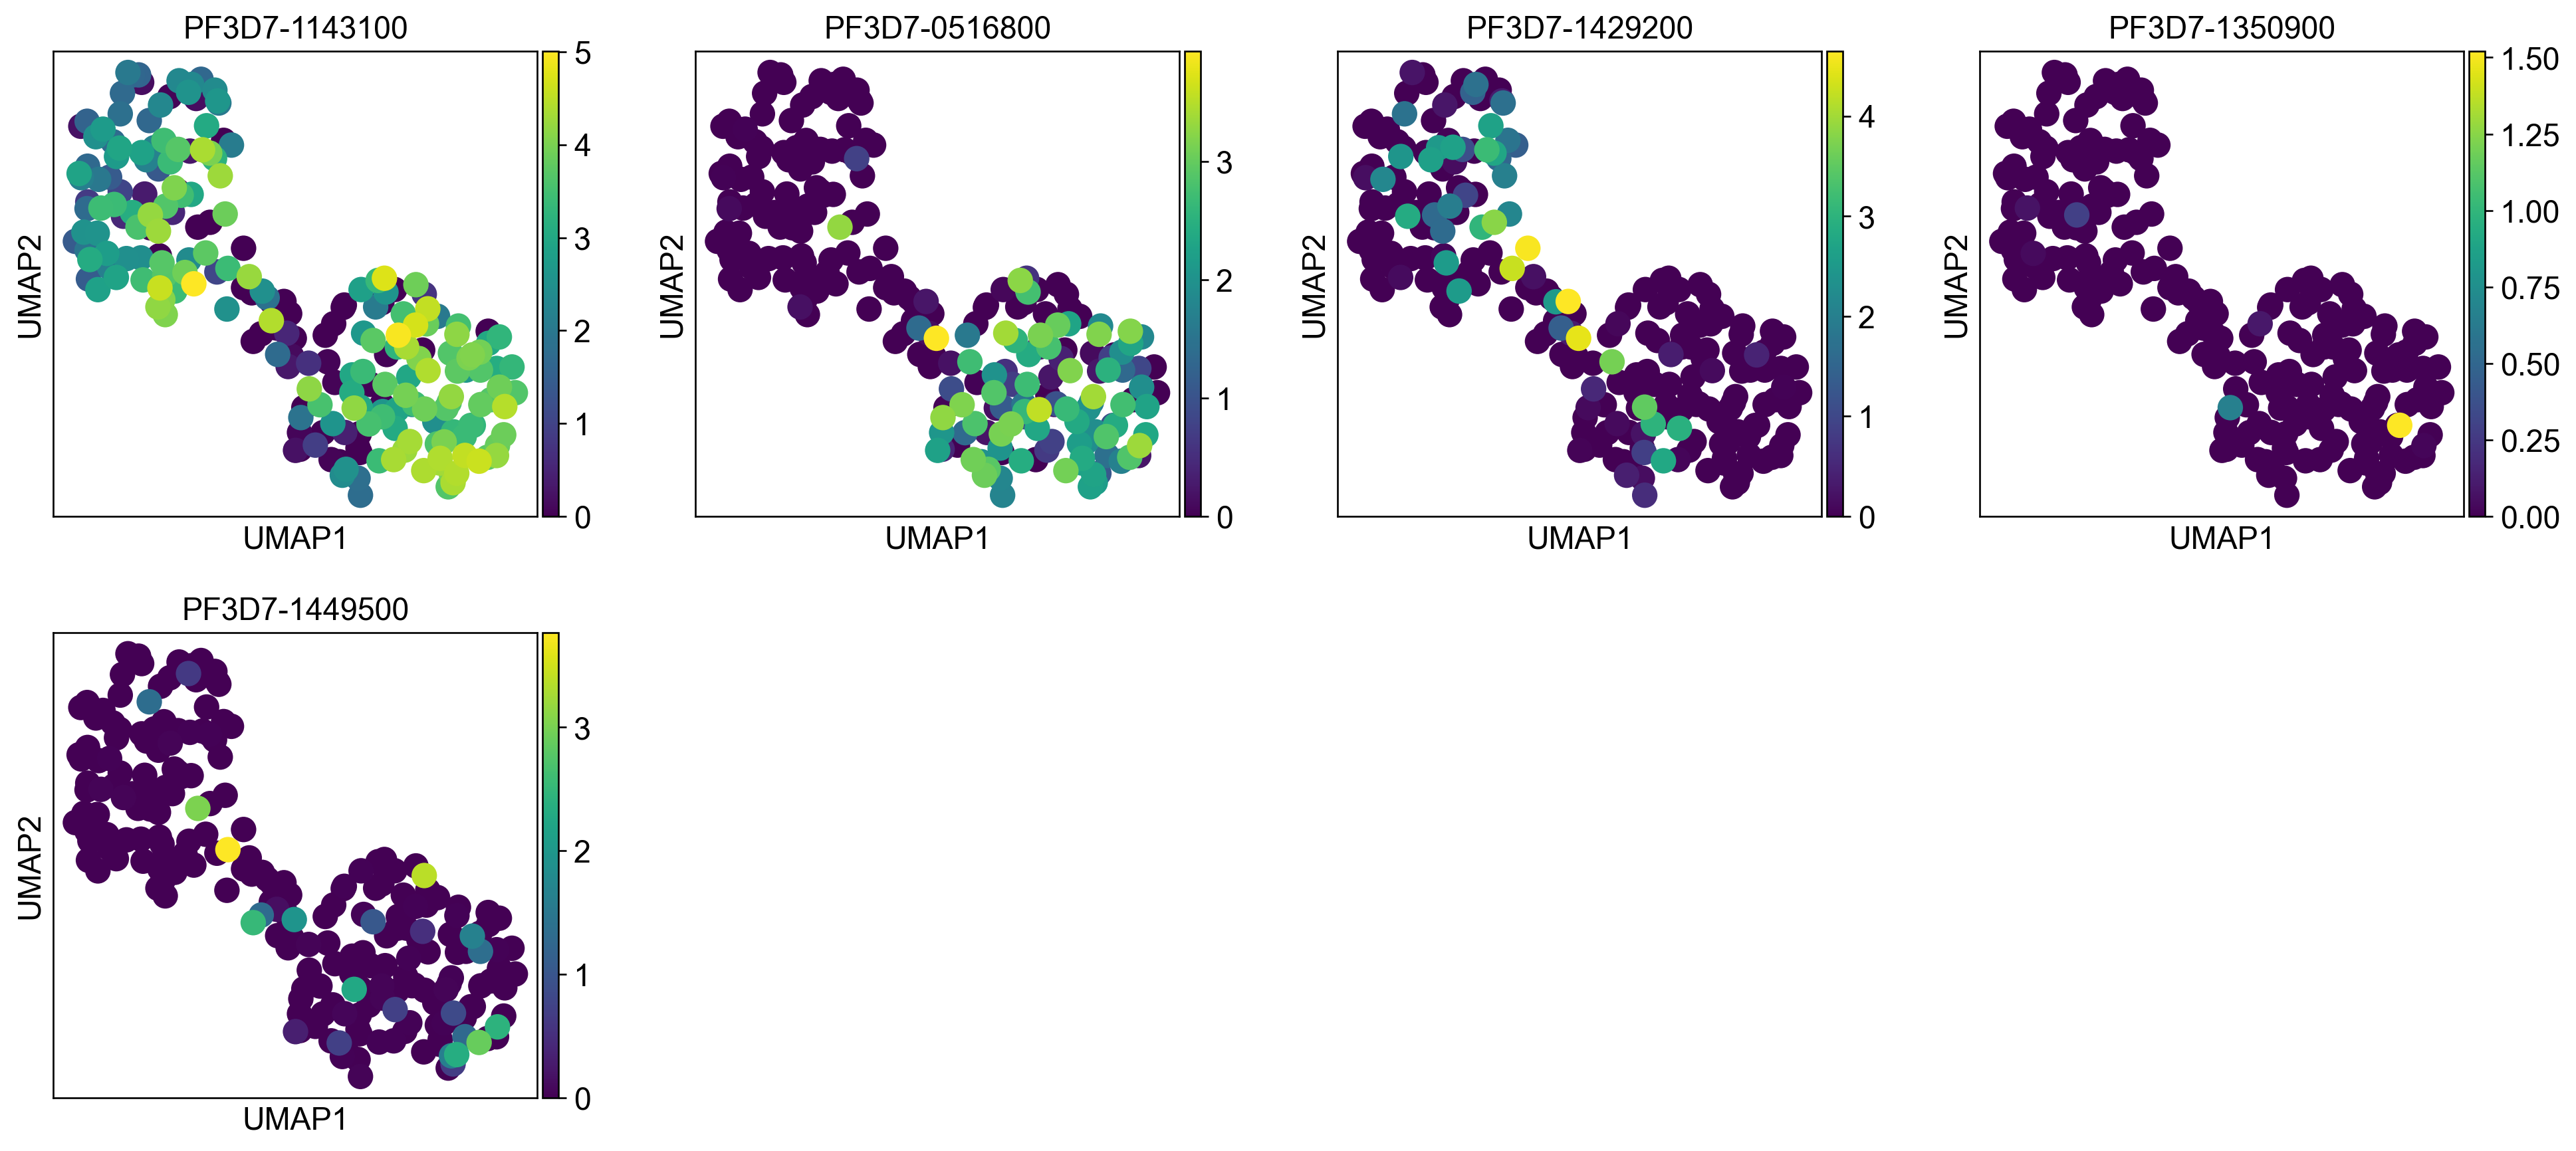

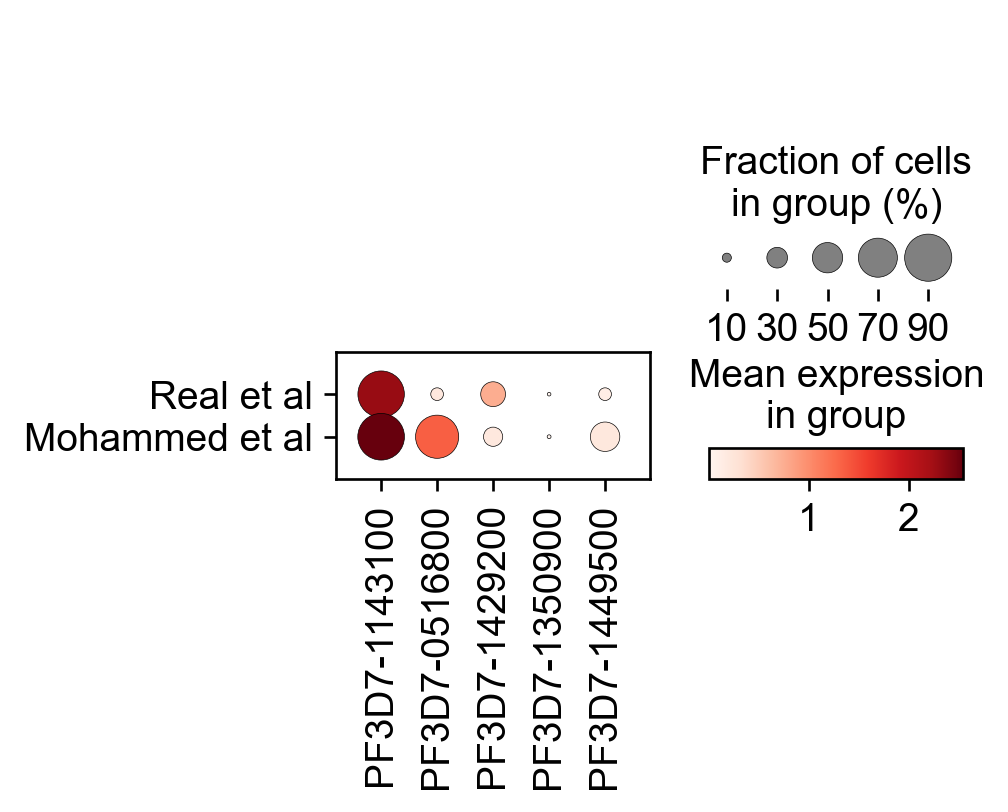

In [3]:
markers = ['PF3D7-1143100', 'PF3D7-0516800', 'PF3D7-1429200', 'PF3D7-1350900', 'PF3D7-1449500']
sc.pl.umap(adata_concat, color = markers, use_raw=False)
sc.pl.dotplot(adata_concat, markers, groupby='batch', dendrogram=True, use_raw=False)
#pd = sc.pl.dotplot(adata_concat, markers, groupby='batch', cmap='viridis_r').add_totals().show()

In [435]:
#adata_ref.write_h5ad("sc-ook_24h-sanger.h5ad")

In [2]:
adata_concat = sc.read_h5ad("sc-merged-sangervszygote.h5ad")

In [4]:
adata_concat

AnnData object with n_obs × n_vars = 227 × 3374
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'npgnum', 'tag', 'blastreads', 'blasttop', 'sample_id', 'stage', 'day', 'num_cells', 'cell_num', 'library', 'well', 'time', 'treatment', 'date', 'run', 'filename', 'xfilename', 'strain', 'gate', 'sum', 'detected', 'percent_top_50', 'percent_top_100', 'percent_top_200', 'percent_top_500', 'total', 'group', 'use', 'sizeFactor', 'file', 'sample_accession', 'global_seurat_clusters', 'pseudopseudotime', 'gam_sex', 'ook_seurat_clusters', 'ook_slingPseudotime', 'integration_clusters', 'scmap_topcell', 'scmap_topcell_ShortenedLifeStage2', 'scmap_topcell_cossim', 'spz_seurat_clusters', 'spz_slingshot_pseudotime', 'r_Spearman_Lindner', 'Prediction_Spearman_Lindner', 'r_Pearsons_Lindner', 'Prediction_Pearsons_Lindner', 'act_spz', 'n_genes', 'louvain', 'Timepoint', 'num_genes_expressed', 'Groups', 'batch', 'umap_density_batch'
    var: 'features', 'n_cells-Mohammed et al', 'highly_variable-Mohammed

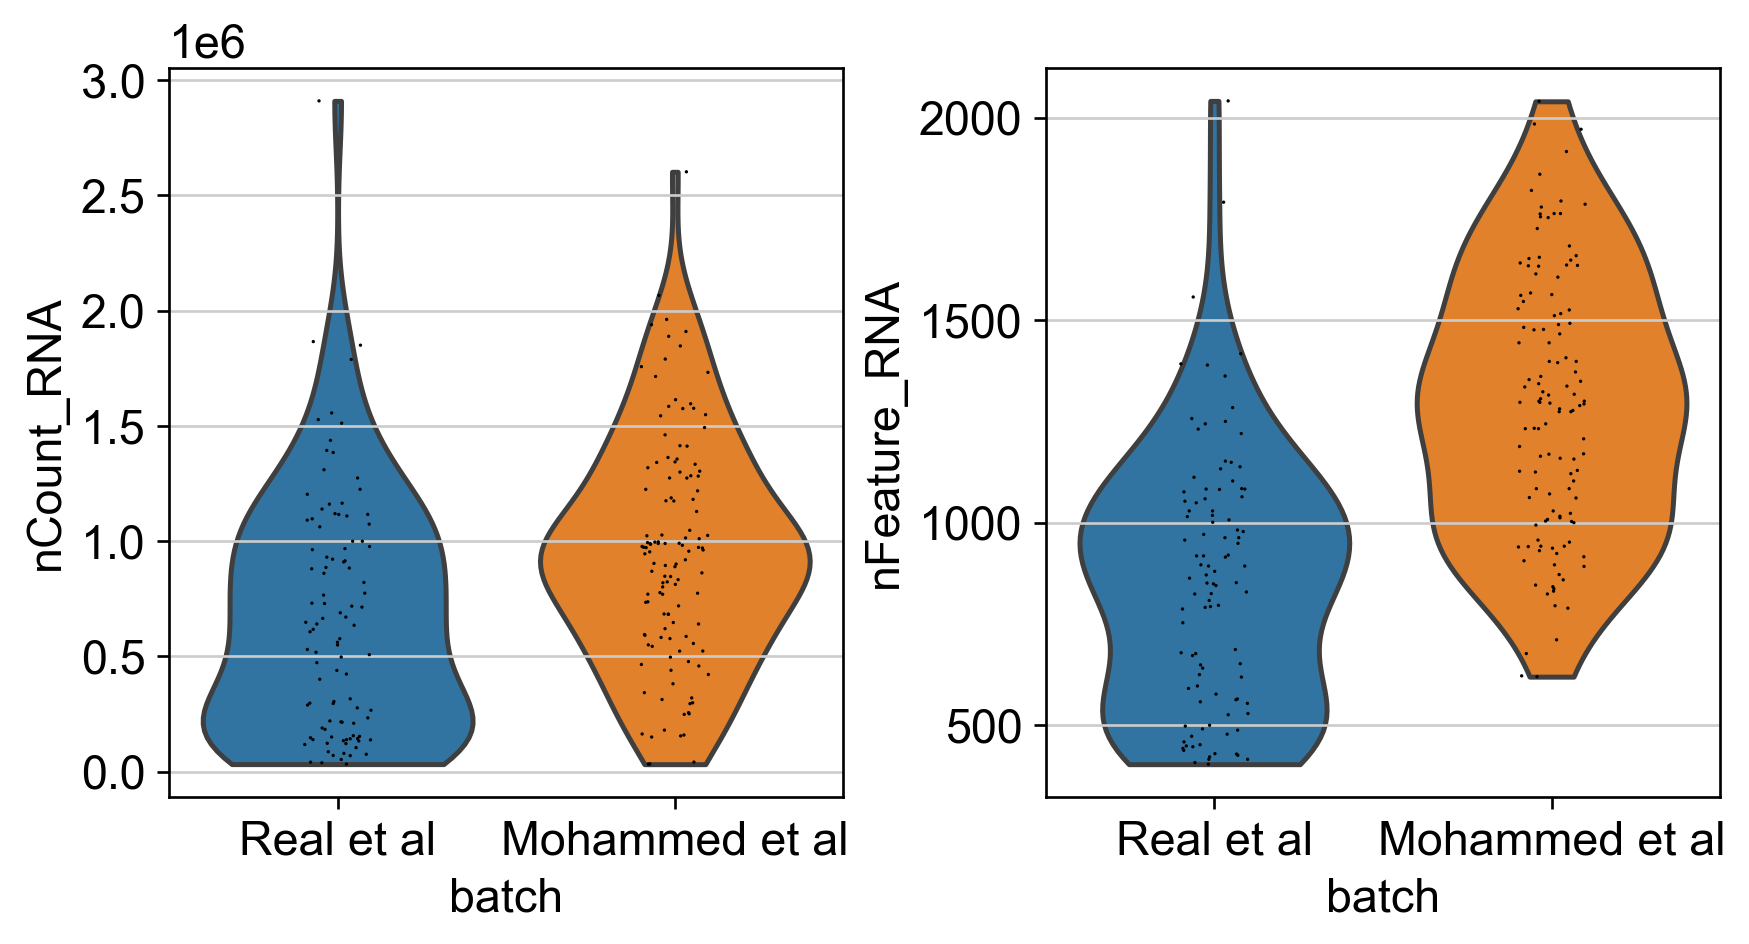

In [8]:
sc.pl.violin(adata_concat, ['nCount_RNA', 'nFeature_RNA'], groupby= 'batch' )

In [11]:
df = pd.DataFrame(adata_concat.obs)

In [45]:
df

orig.ident  nCount_RNA  nFeature_RNA  \
X29913_7_100_sorted.bam-Real et al           0    976482.0          1007   
X29913_7_102_sorted.bam-Real et al           0   1115442.0           978   
X29913_7_107_sorted.bam-Real et al           0    717722.0           825   
X29913_7_108_sorted.bam-Real et al           0    921483.0          1029   
X29913_7_109_sorted.bam-Real et al           0   1556059.0          1082   
...                                        ...         ...           ...   
T20-20-Mohammed et al                        0   2602314.0          1188   
T20-2-Mohammed et al                         0   1299358.0           994   
T20-3-Mohammed et al                         0   1175000.0          1129   
T20-6-Mohammed et al                         0    846350.0          1012   
T20-8-Mohammed et al                         0   1789860.0           952   

                                    npgnum                tag  blastreads  \
X29913_7_100_sorted.bam-Real et al   100.0  GGCTGAAT-TCGTGATC     90260.0   
X29913_7_102_sorted.bam-Real et al   102.0  ACGTTGCT-ACGTCTGT    100396.0   
X29913_7_107_sorted.bam-Real et al   107.0  CCACGTAT-CCGTCCCG     65385.0   
X29913_7_108_sorted.bam-Real et al   108.0  GTGCATTT-ACCCATCG     88671.0   
X29913_7_109_sorted.bam-Real et al   109.0  AGCCTGCA-TGGAGTGT    143703.0   
...                                    ...                ...         ...   
T20-20-Mohammed et al                  NaN                NaN         NaN   
T20-2-Mohammed et al                   NaN                NaN         NaN   
T20-3-Mohammed et al                   NaN                NaN         NaN   
T20-6-Mohammed et al                   NaN                NaN         NaN   
T20-8-Mohammed et al                   NaN                NaN         NaN   

                                                       blasttop  \
X29913_7_100_sorted.bam-Real et al  Plasmodium falciparum: 73.0   
X29913_7_102_sorted.bam-Real et al  Plasmodium falciparum: 75.0   
X29913_7_107_sorted.bam-Real et al  Plasmodium falciparum: 75.3   
X29913_7_108_sorted.bam-Real et al  Plasmodium falciparum: 71.1   
X29913_7_109_sorted.bam-Real et al  Plasmodium falciparum: 70.8   
...                                                         ...   
T20-20-Mohammed et al                                       NaN   
T20-2-Mohammed et al                                        NaN   
T20-3-Mohammed et al                                        NaN   
T20-6-Mohammed et al                                        NaN   
T20-8-Mohammed et al                                        NaN   

                                                  sample_id stage   day  ...  \
X29913_7_100_sorted.bam-Real et al  X29913_7_100_sorted.bam   ook  day1  ...   
X29913_7_102_sorted.bam-Real et al  X29913_7_102_sorted.bam   ook  day1  ...   
X29913_7_107_sorted.bam-Real et al  X29913_7_107_sorted.bam   ook  day1  ...   
X29913_7_108_sorted.bam-Real et al  X29913_7_108_sorted.bam   ook  day1  ...   
X29913_7_109_sorted.bam-Real et al  X29913_7_109_sorted.bam   ook  day1  ...   
...                                                     ...   ...   ...  ...   
T20-20-Mohammed et al                                   NaN   NaN   NaN  ...   
T20-2-Mohammed et al                                    NaN   NaN   NaN  ...   
T20-3-Mohammed et al                                    NaN   NaN   NaN  ...   
T20-6-Mohammed et al                                    NaN   NaN   NaN  ...   
T20-8-Mohammed et al                                    NaN   NaN   NaN  ...   

                                   r_Pearsons_Lindner  \
X29913_7_100_sorted.bam-Real et al                NaN   
X29913_7_102_sorted.bam-Real et al                NaN   
X29913_7_107_sorted.bam-Real et al                NaN   
X29913_7_108_sorted.bam-Real et al                NaN   
X29913_7_109_sorted.bam-Real et al                NaN   
...                                               ...   
T20-20-Mohammed et al            

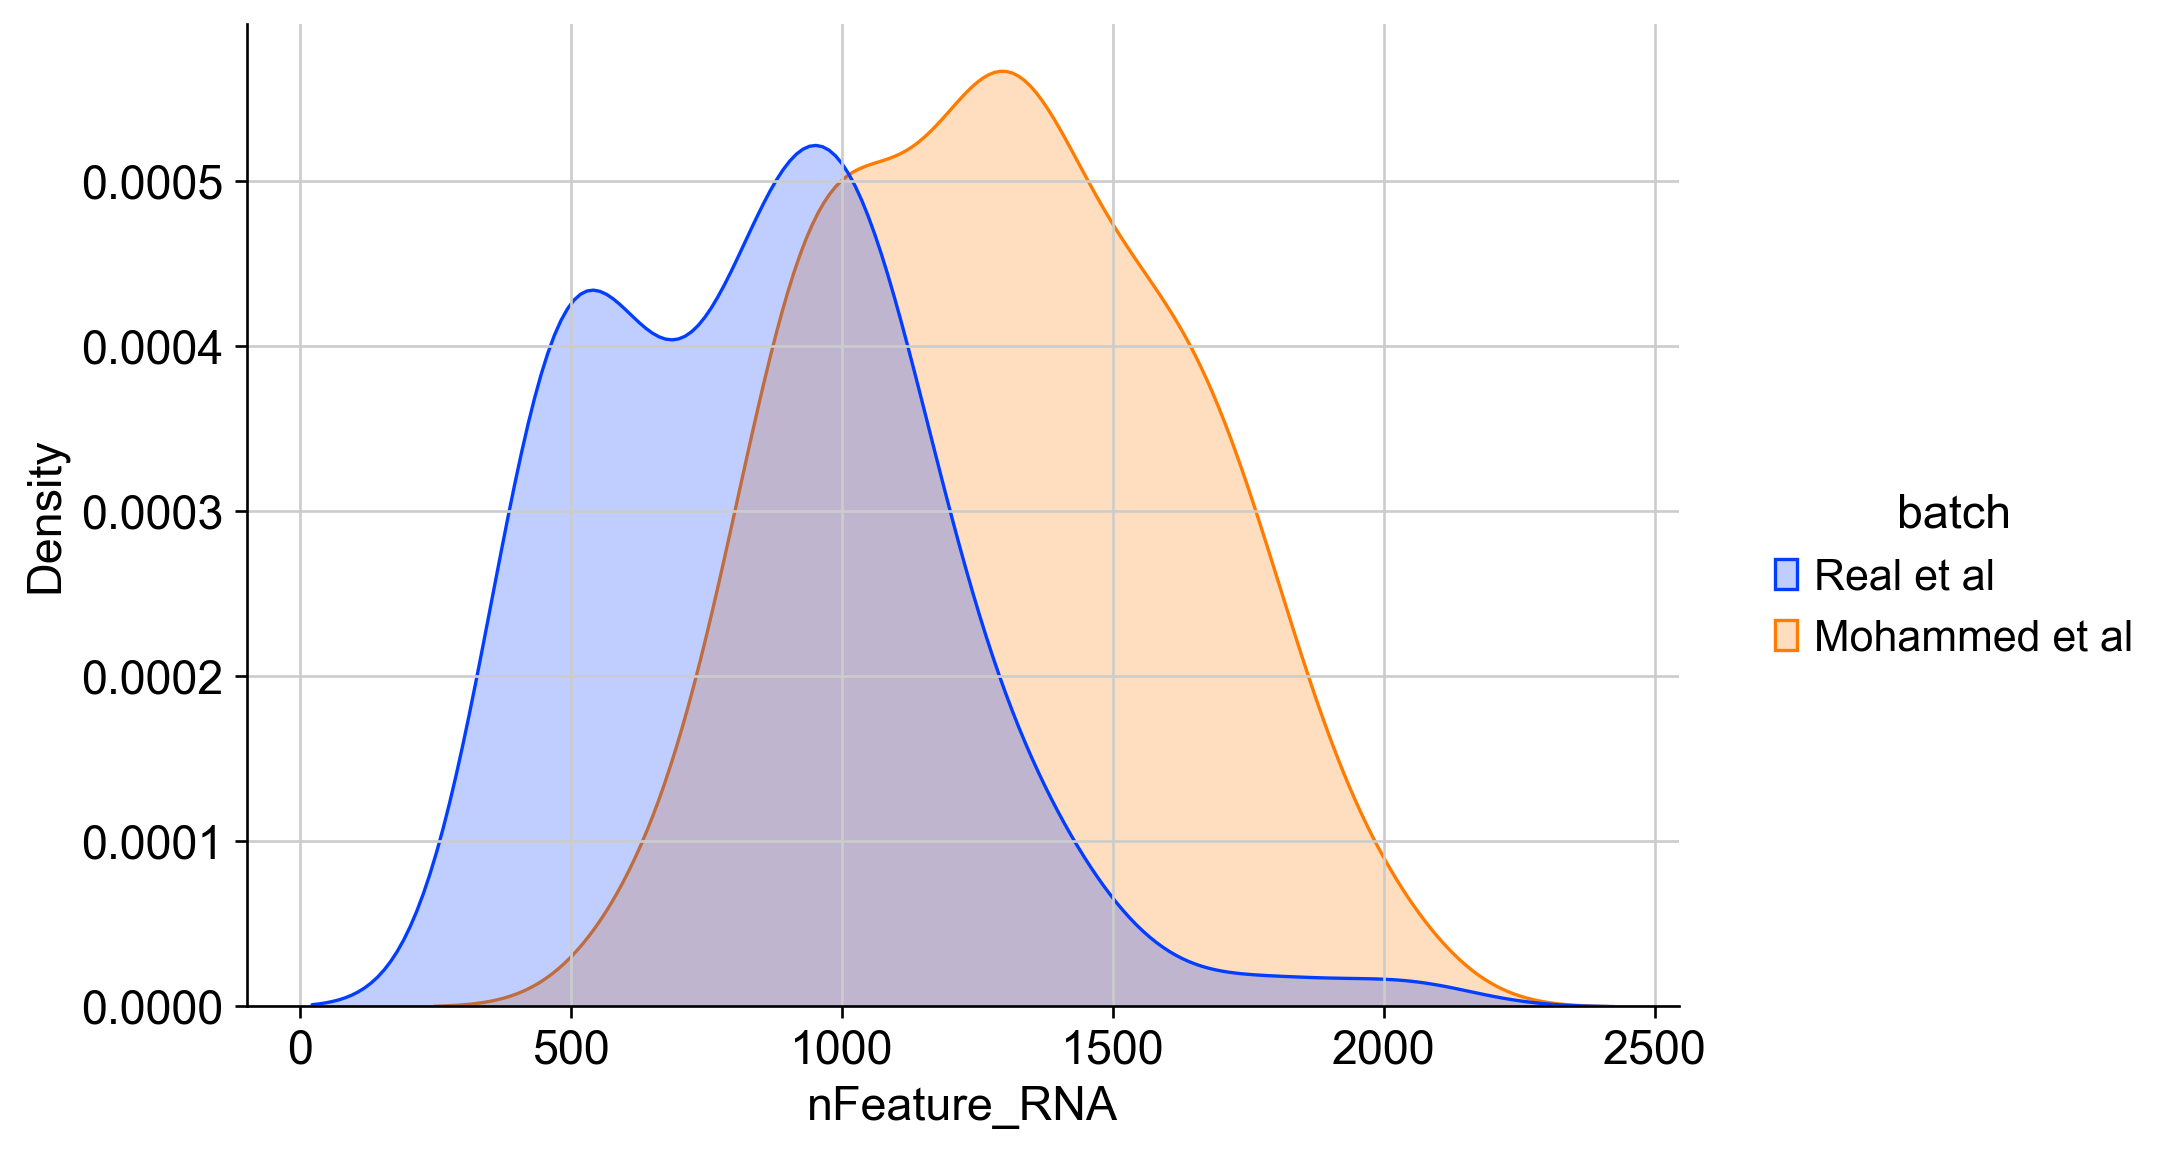

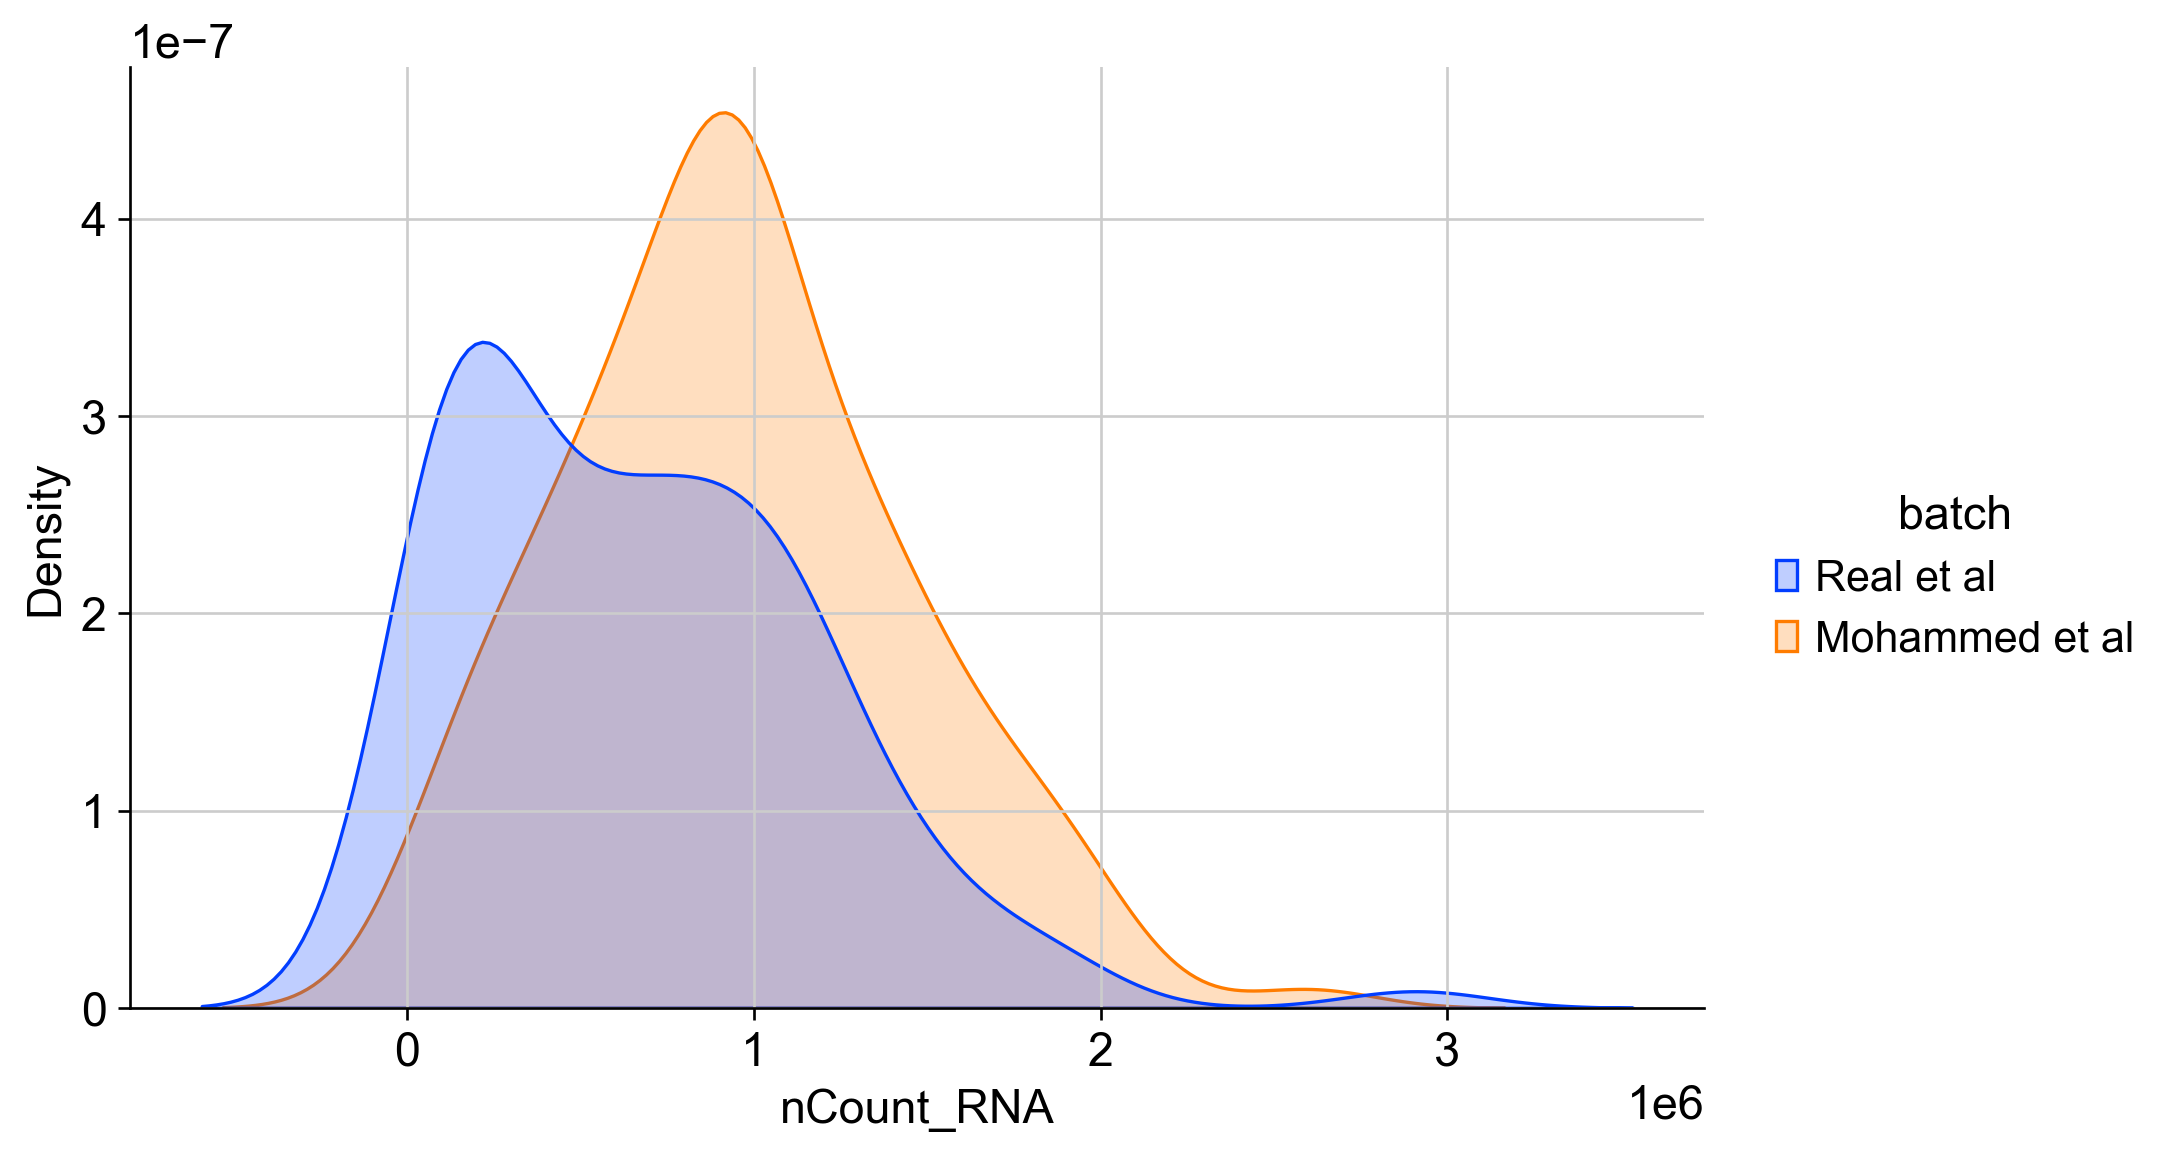

In [50]:
fig = sns.displot(data=df, x='nFeature_RNA', hue='batch', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
fig = sns.displot(data=df, x='nCount_RNA', hue='batch', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
plt.show()

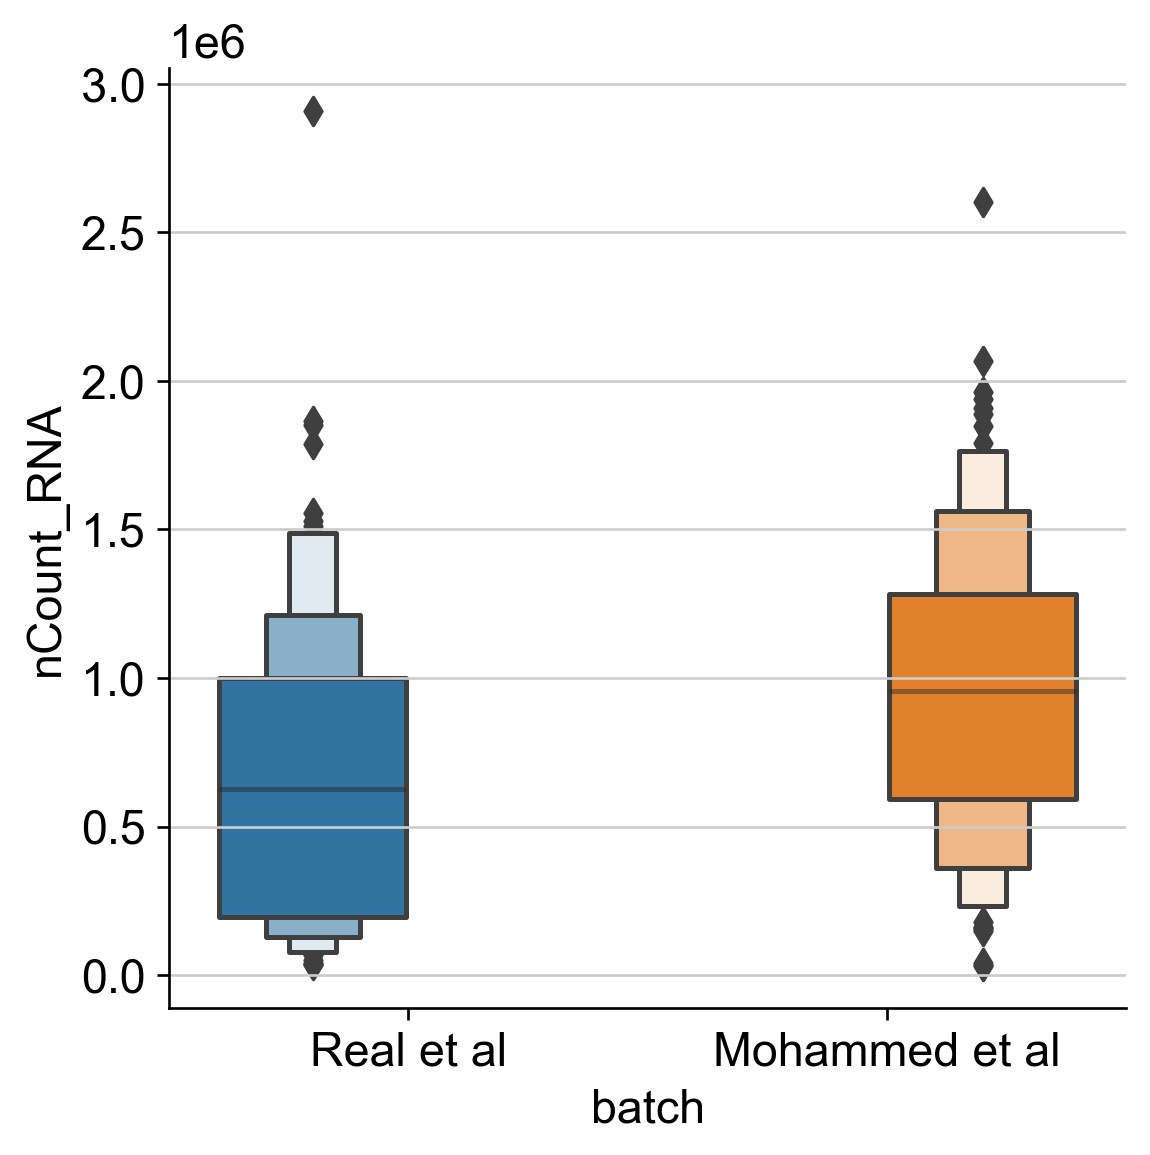

In [60]:
sns.catplot(x="batch", y="nCount_RNA", hue="batch", kind="boxen", data=df)

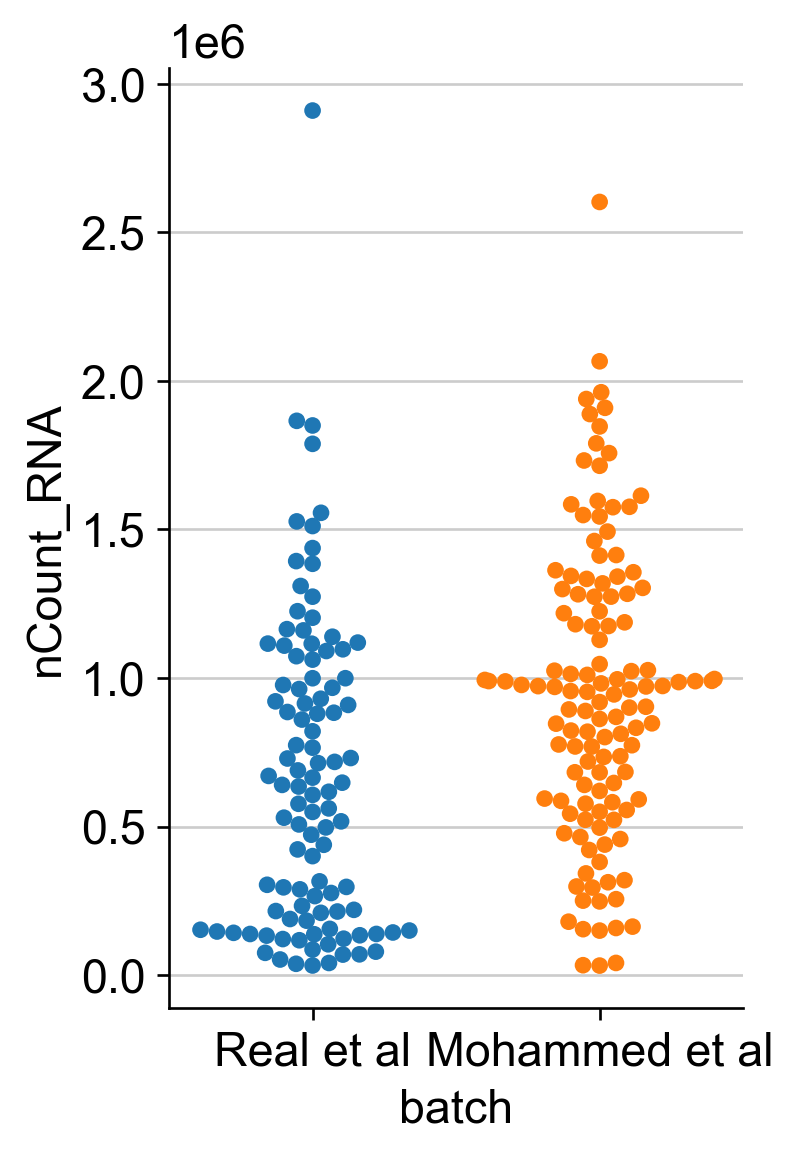

In [63]:
sns.catplot(x="batch", y="nCount_RNA", hue="batch", aspect=.7, kind="swarm", data=df)

<AxesSubplot:xlabel='batch', ylabel='nCount_RNA'>

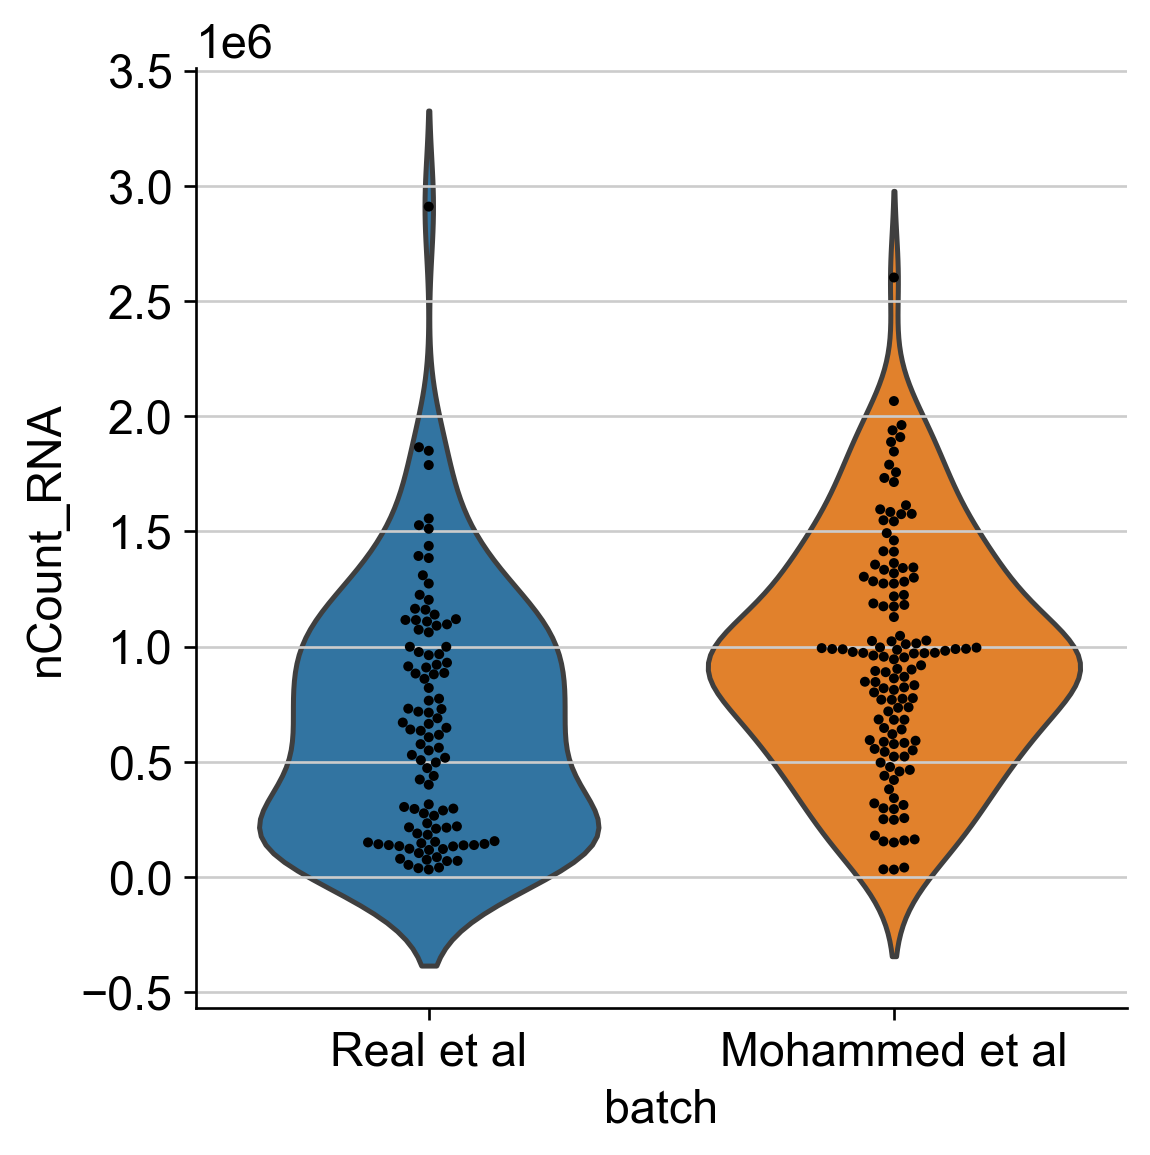

In [67]:
g = sns.catplot(x="batch", y="nCount_RNA", kind="violin", inner=None, data=df)
sns.swarmplot(x="batch", y="nCount_RNA", color="k", size=3, data=df, ax=g.ax)

<AxesSubplot:xlabel='batch', ylabel='nFeature_RNA'>

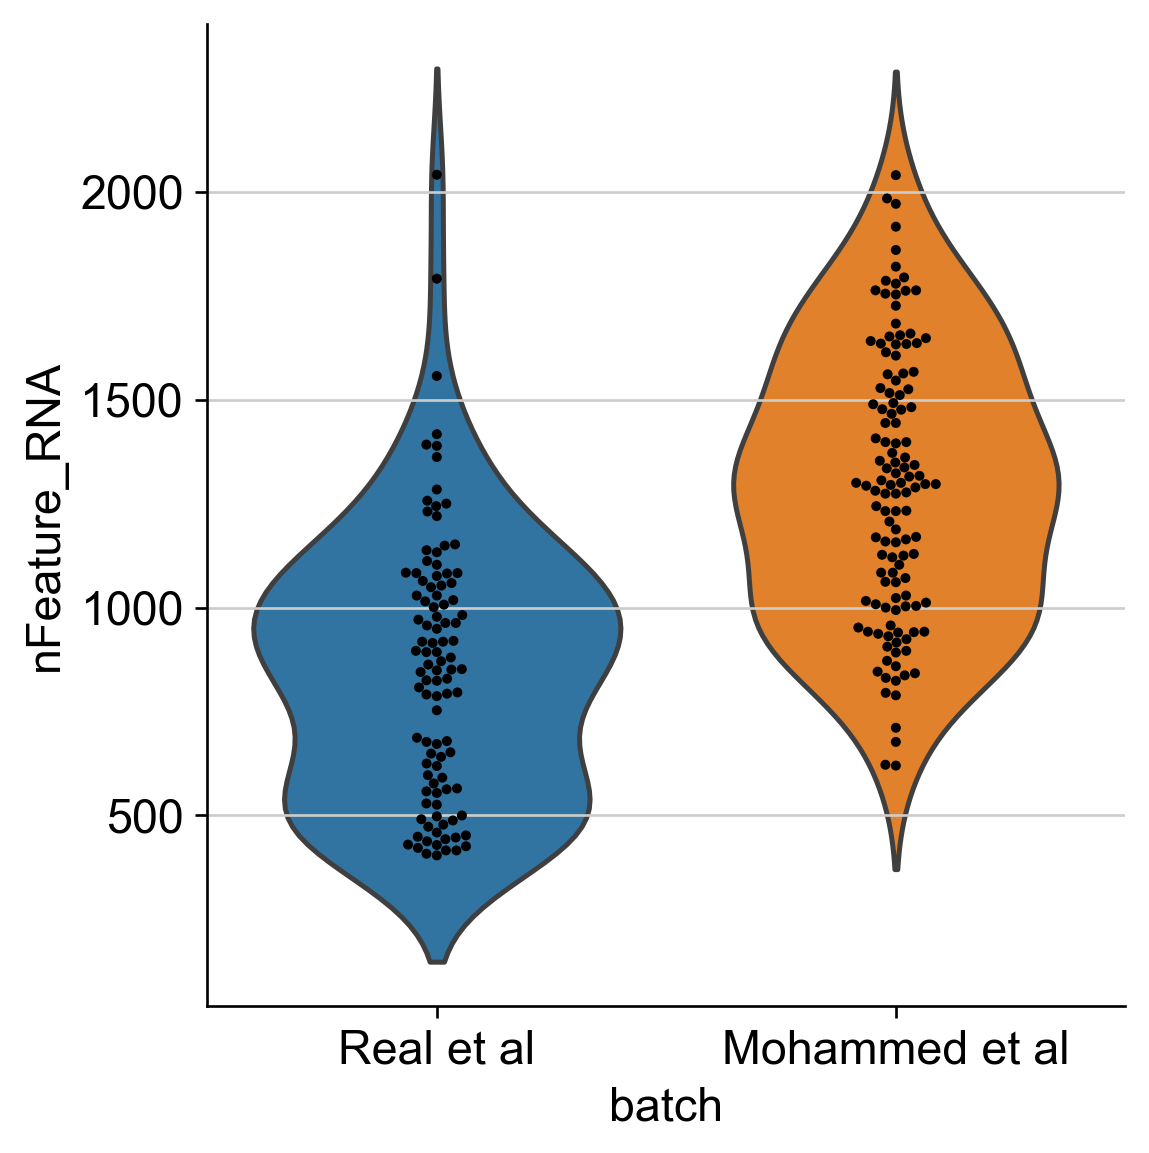

In [68]:
g = sns.catplot(x="batch", y="nFeature_RNA", kind="violin", inner=None, data=df)
sns.swarmplot(x="batch", y="nFeature_RNA", color="k", size=3, data=df, ax=g.ax)